In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Understanding The Data**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Cardiovascular Diseases Risk Prediction Dataset.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.shape

(308854, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [6]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [7]:
df.duplicated().sum()

80

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


# **Perform EDA (Exploratory Data Analysis)**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308774 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308774 non-null  object 
 1   Checkup                       308774 non-null  object 
 2   Exercise                      308774 non-null  object 
 3   Heart_Disease                 308774 non-null  object 
 4   Skin_Cancer                   308774 non-null  object 
 5   Other_Cancer                  308774 non-null  object 
 6   Depression                    308774 non-null  object 
 7   Diabetes                      308774 non-null  object 
 8   Arthritis                     308774 non-null  object 
 9   Sex                           308774 non-null  object 
 10  Age_Category                  308774 non-null  object 
 11  Height_(cm)                   308774 non-null  float64
 12  Weight_(kg)                   308774 non-null  fl

**Univariate Analysis**

In [12]:
categorical_data = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
numerical_data = ["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


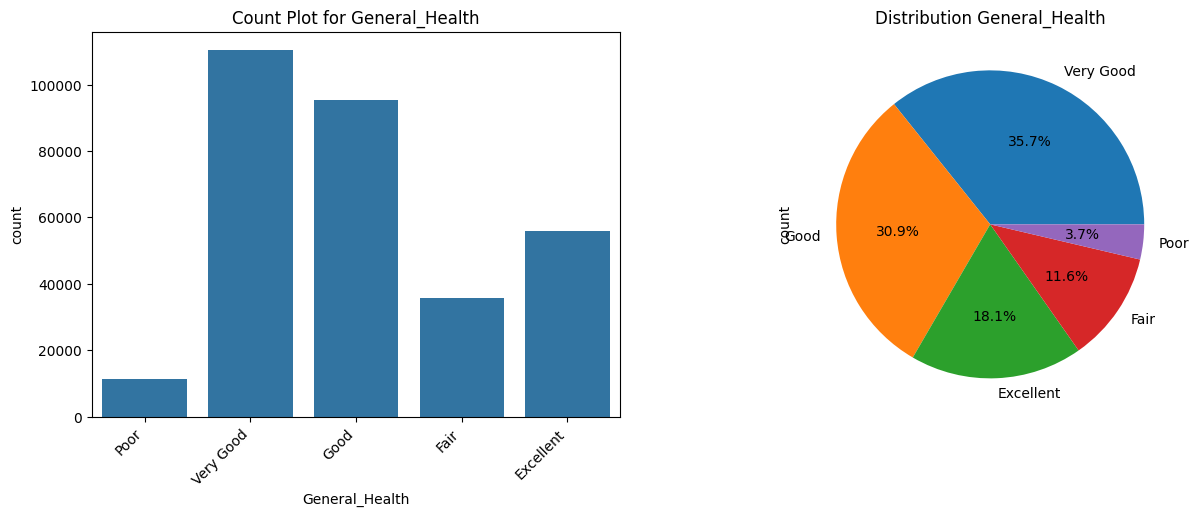

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


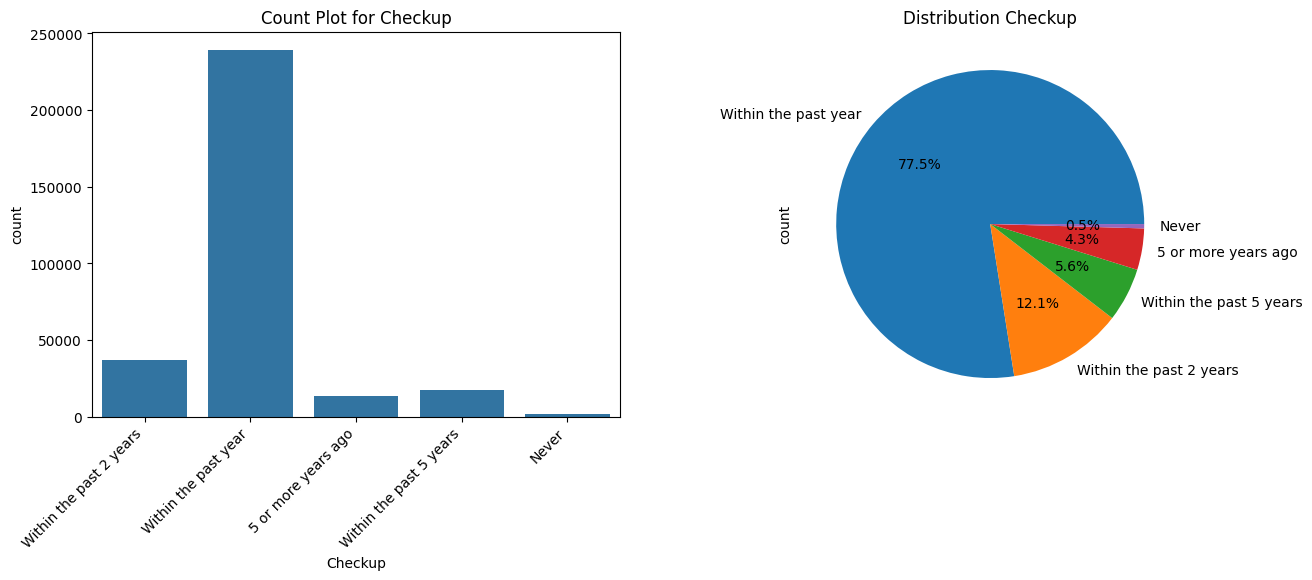

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


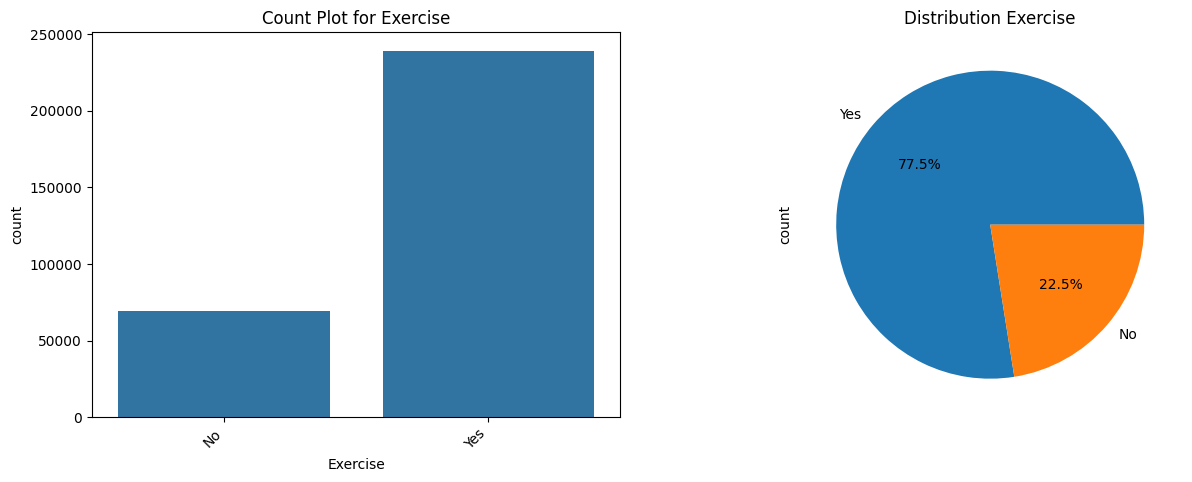

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


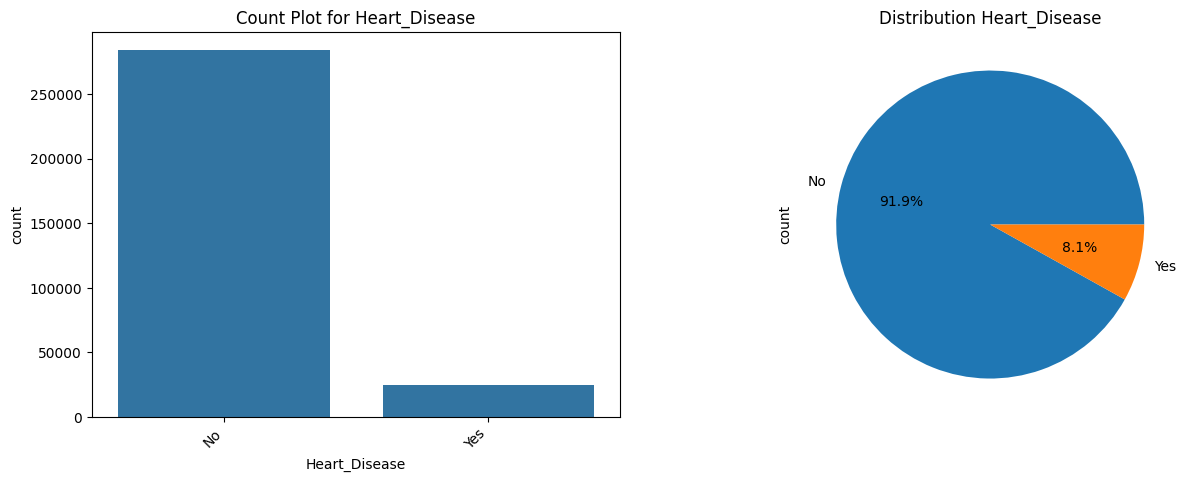

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


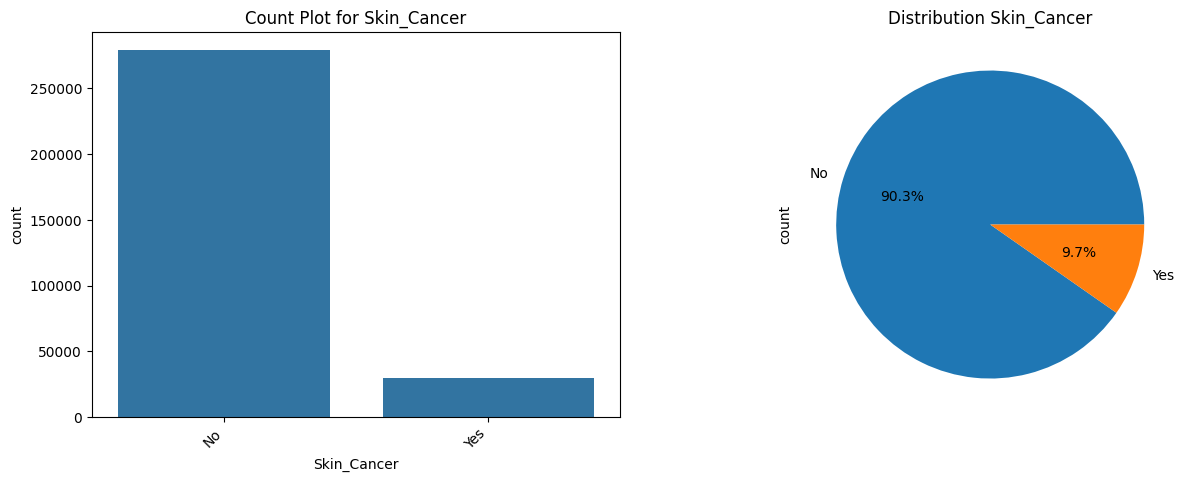

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


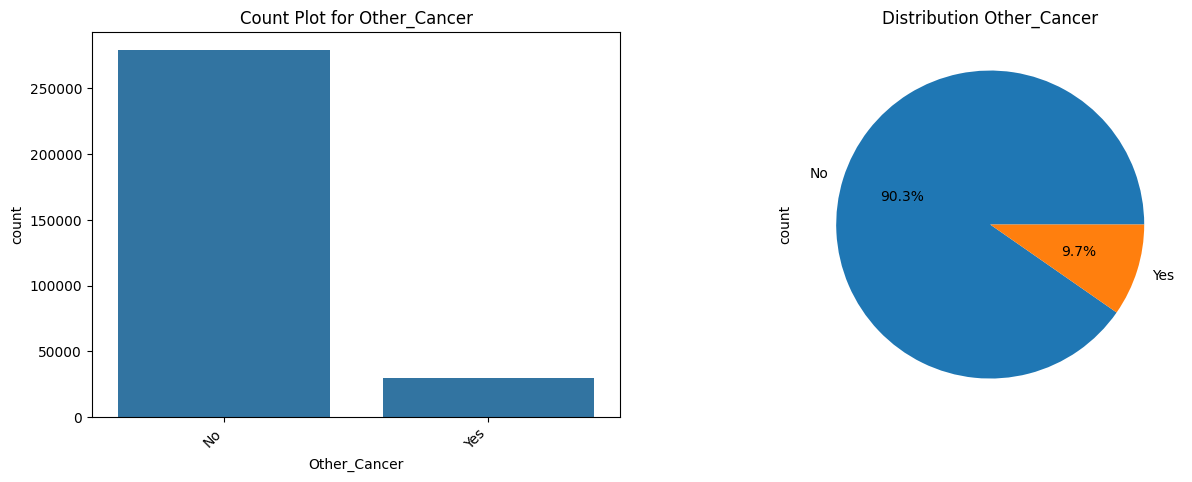

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


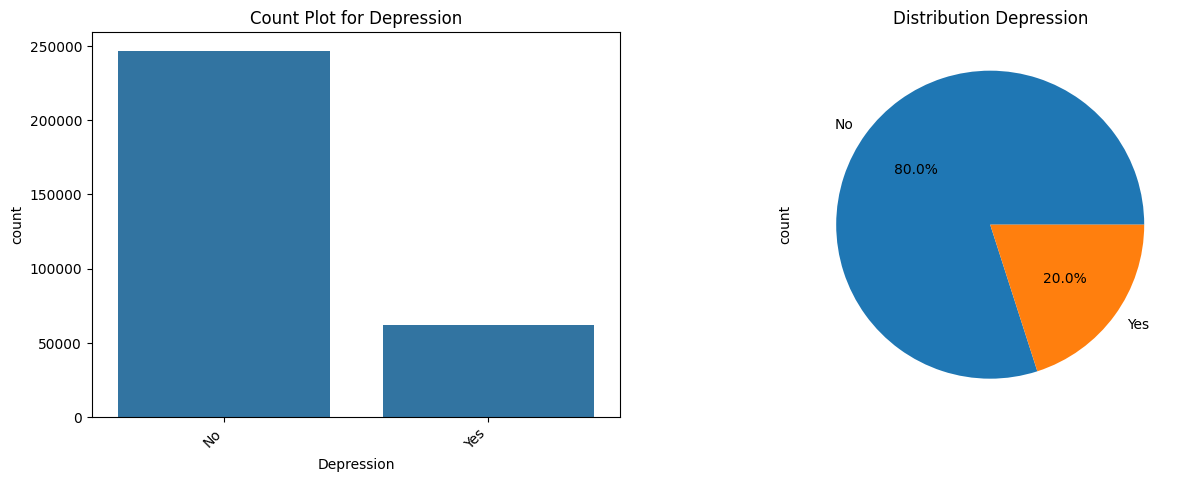

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


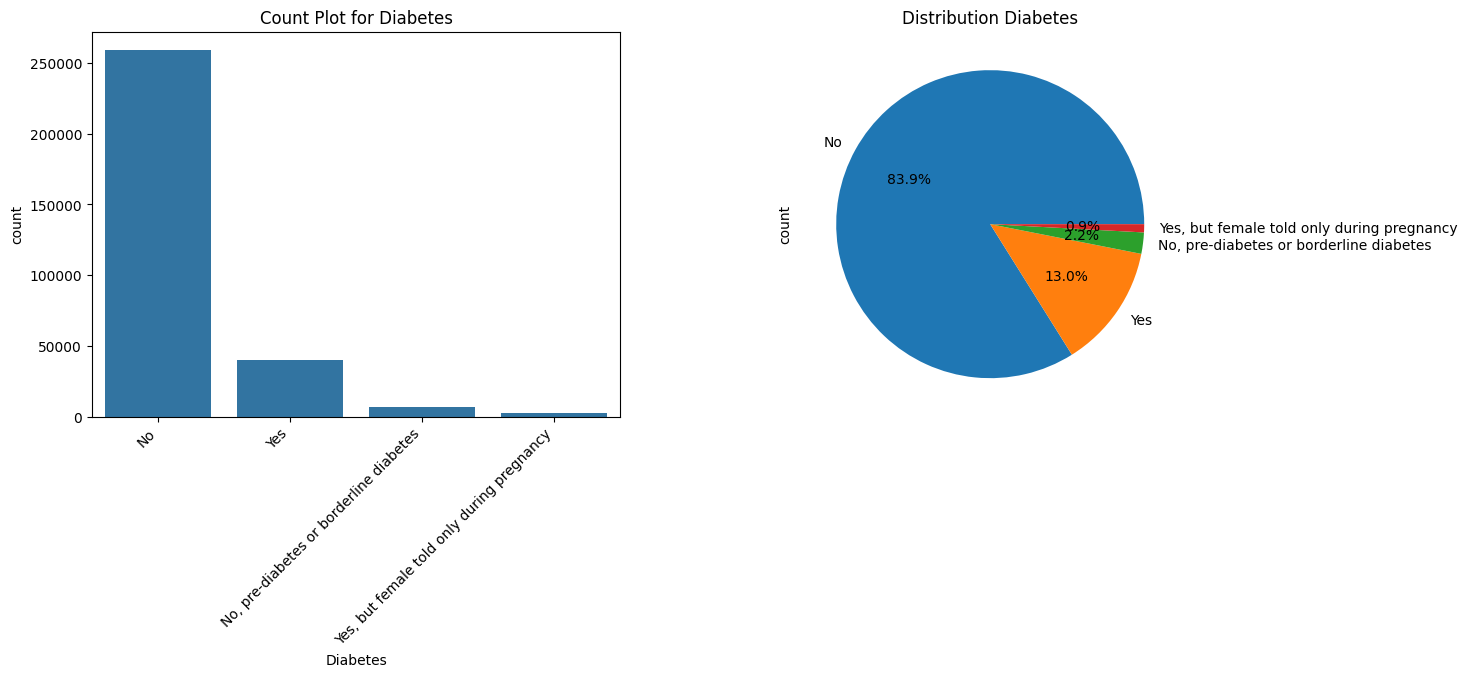

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


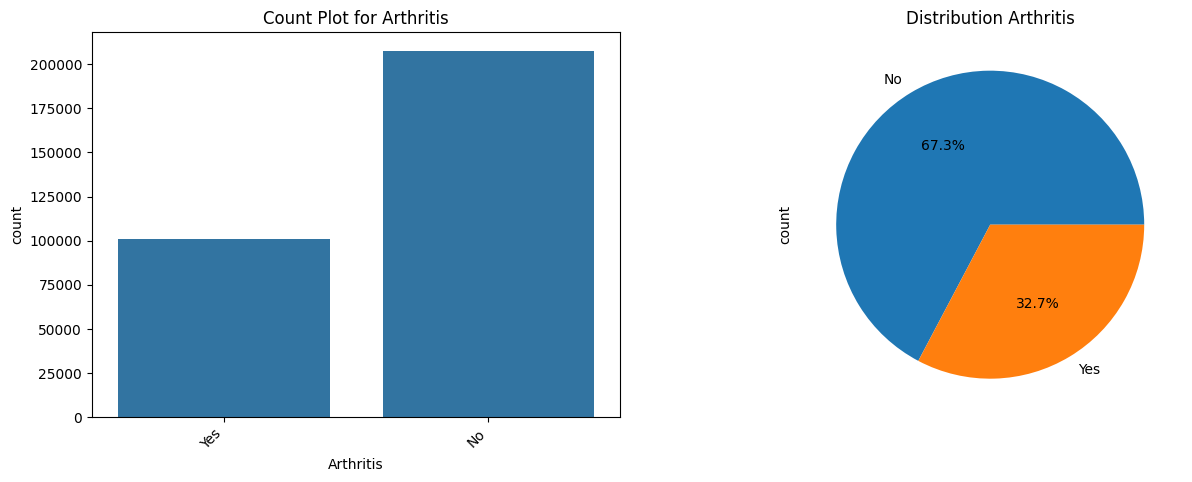

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


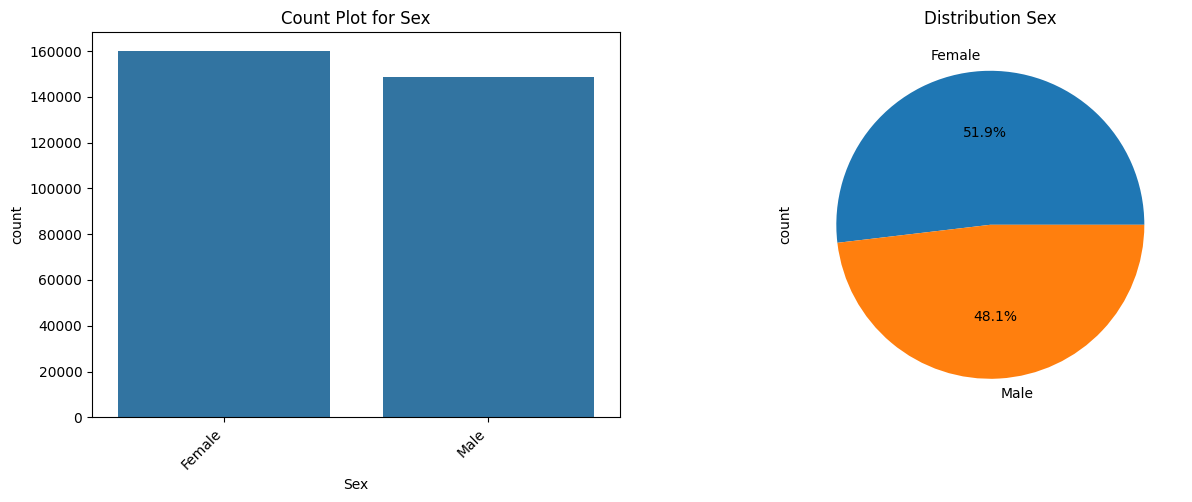

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


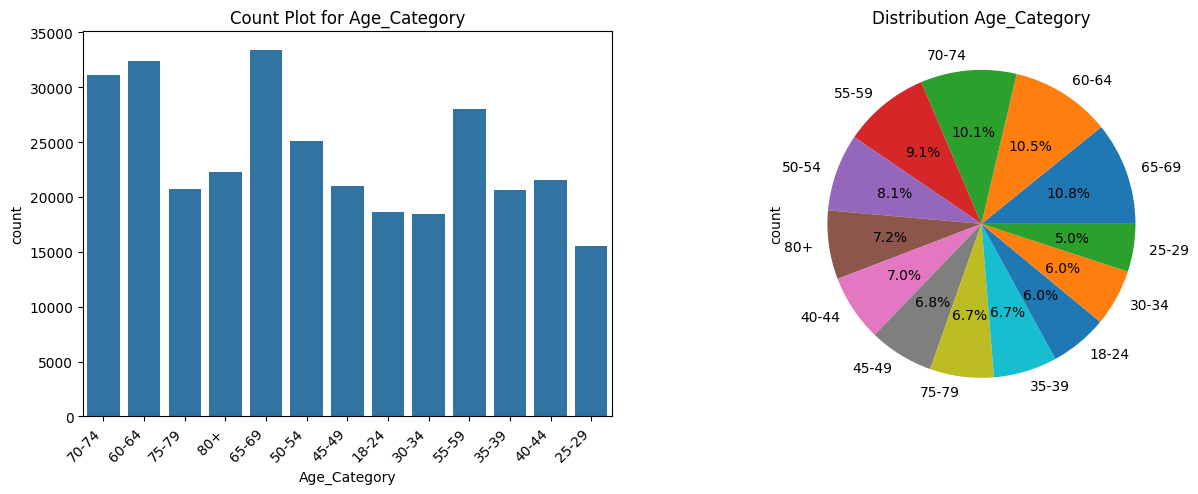

<ipython-input-13-977001b6ec28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


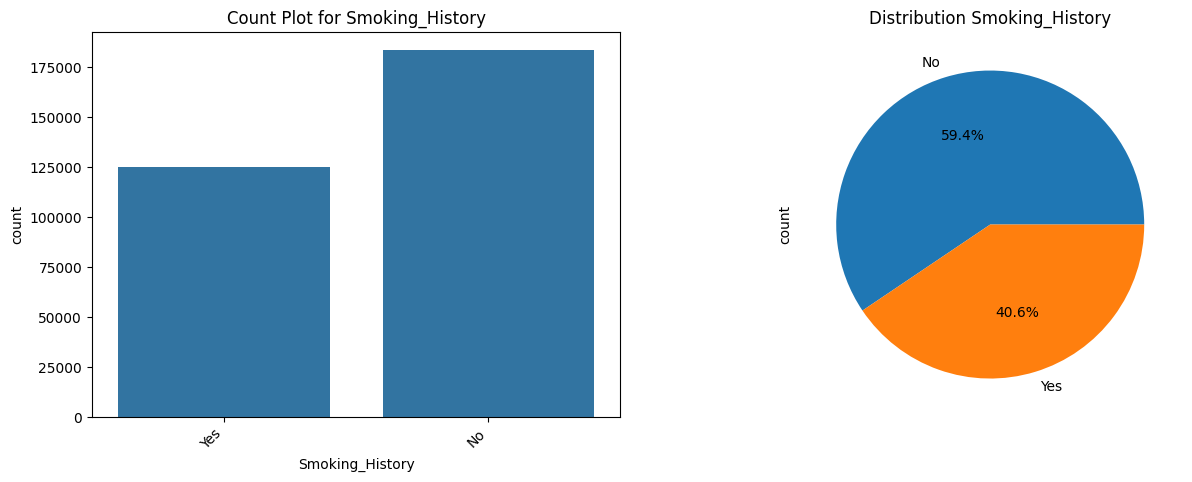

In [13]:
for feature in categorical_data:
    # make two subplots: one for countplot and another for pie chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot countplot
    count_plot = sns.countplot(data=df, x=feature, ax=ax1)
    ax1.set_title(f'Count Plot for {feature}')
    # Change x-ticks for countplot
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    # Plot pie chart
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2)
    ax2.set_title(f'Distribution {feature}')

    plt.show()

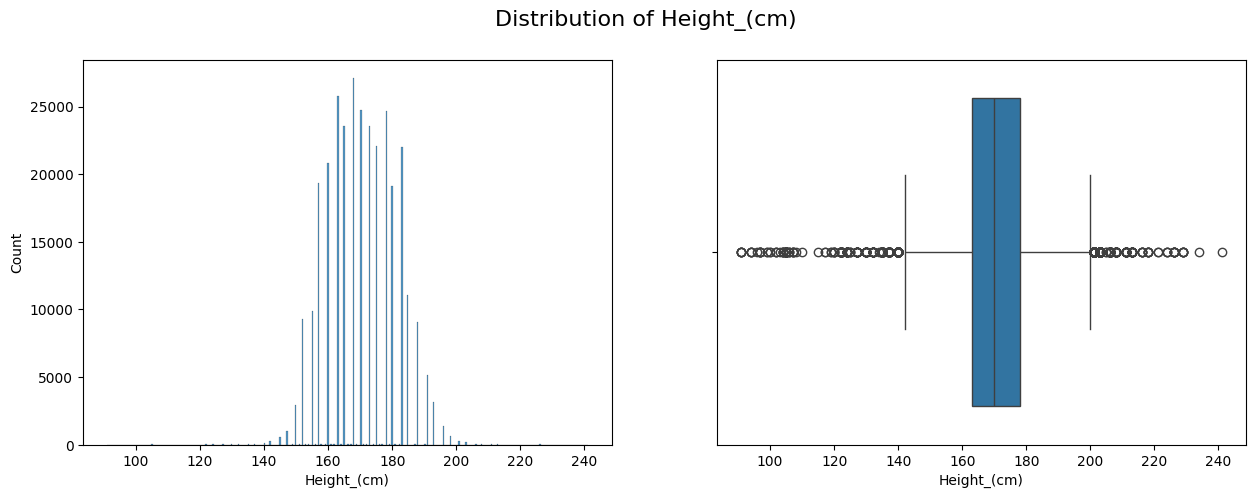

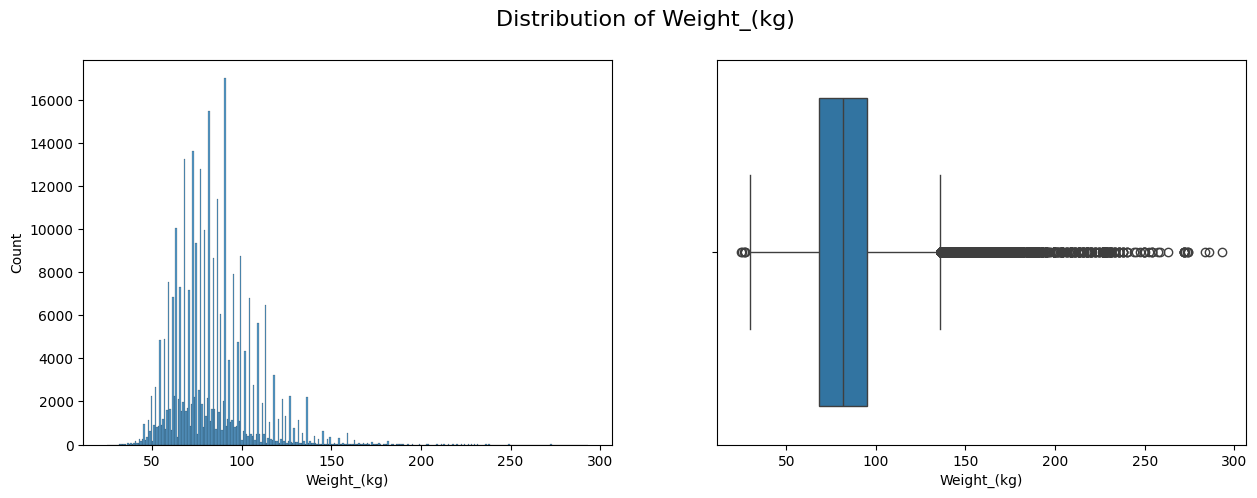

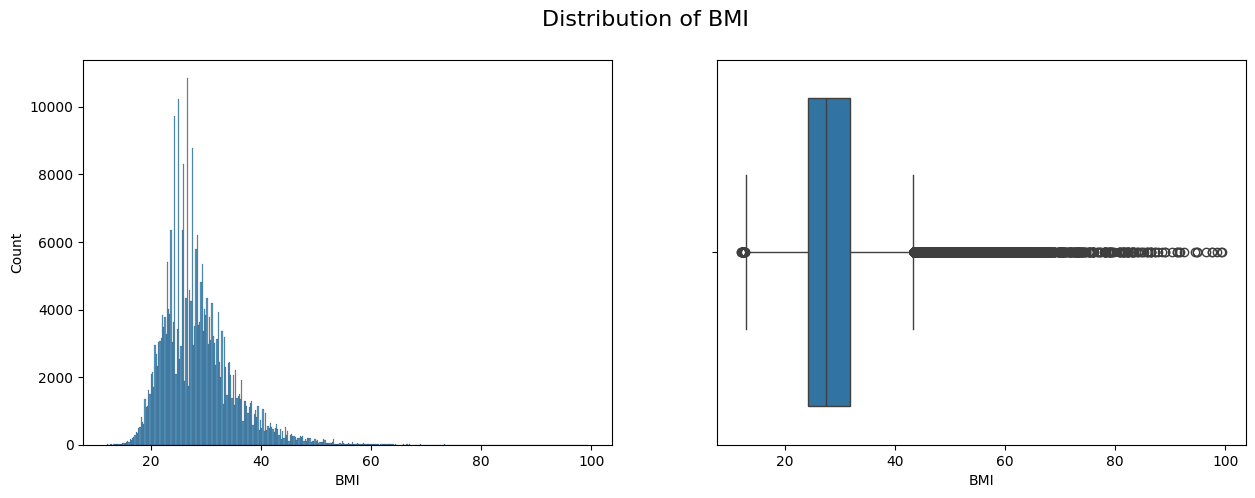

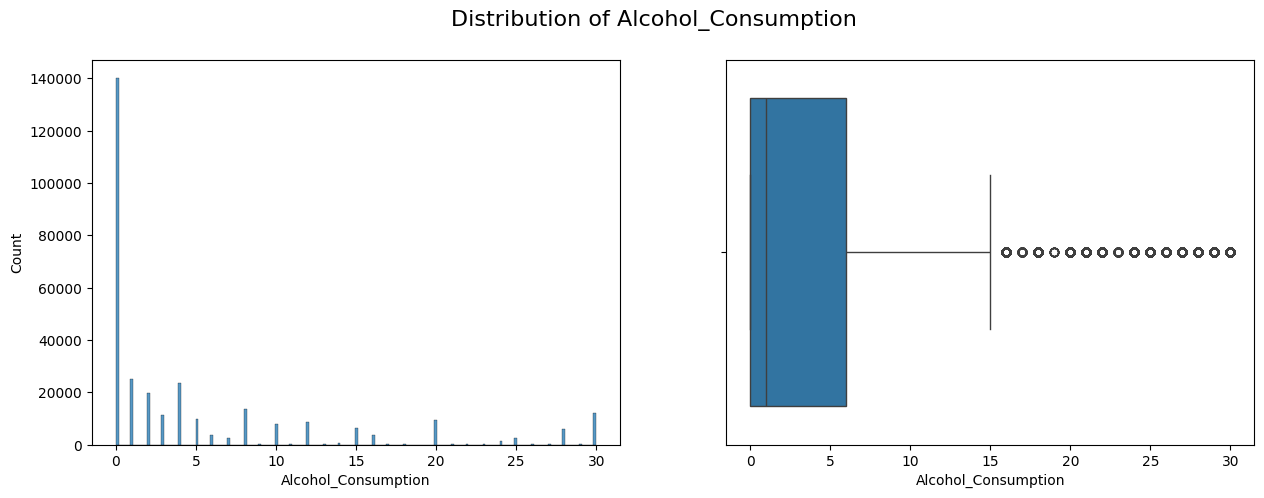

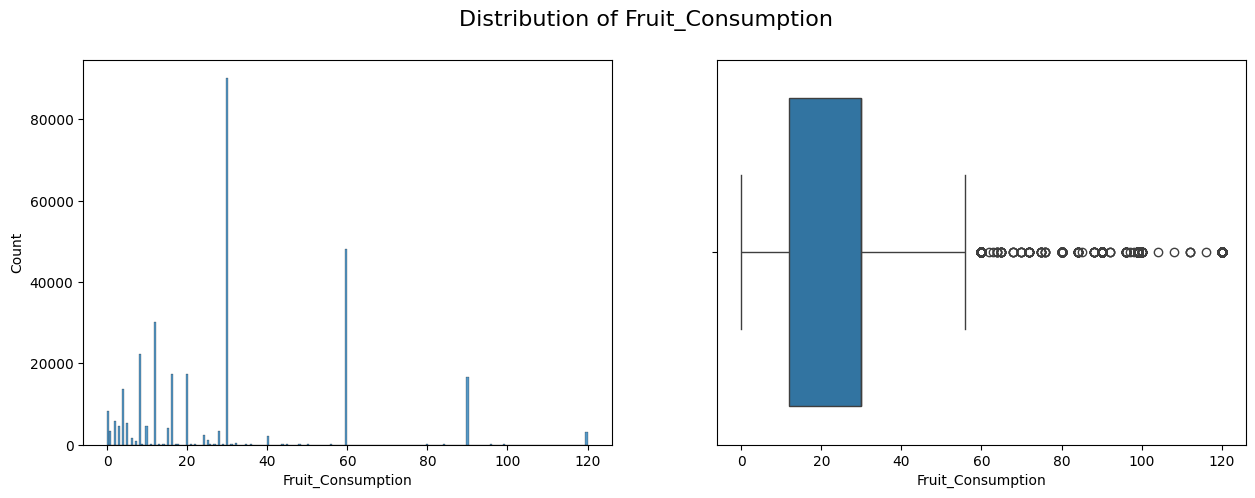

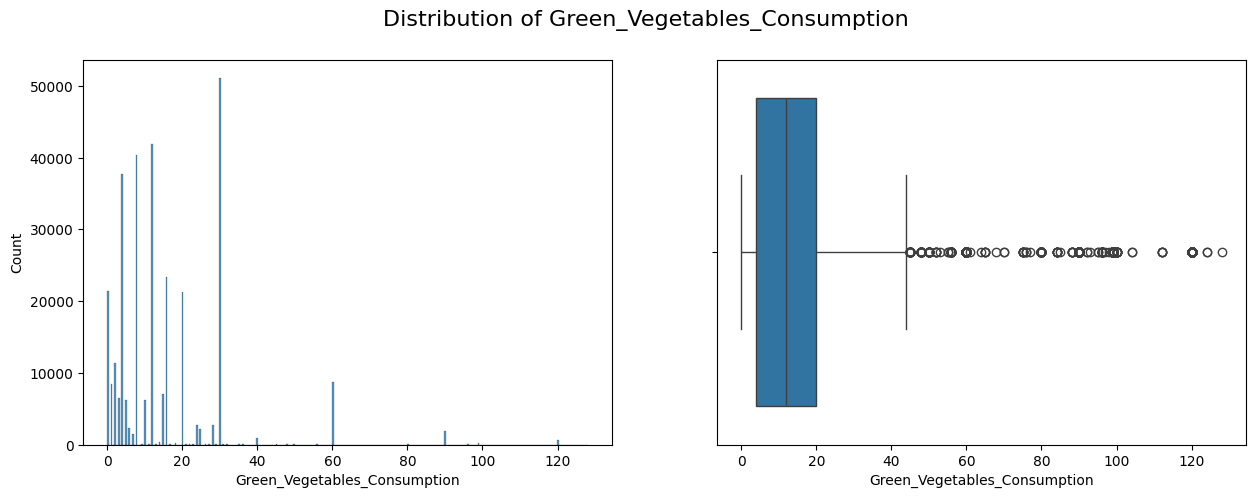

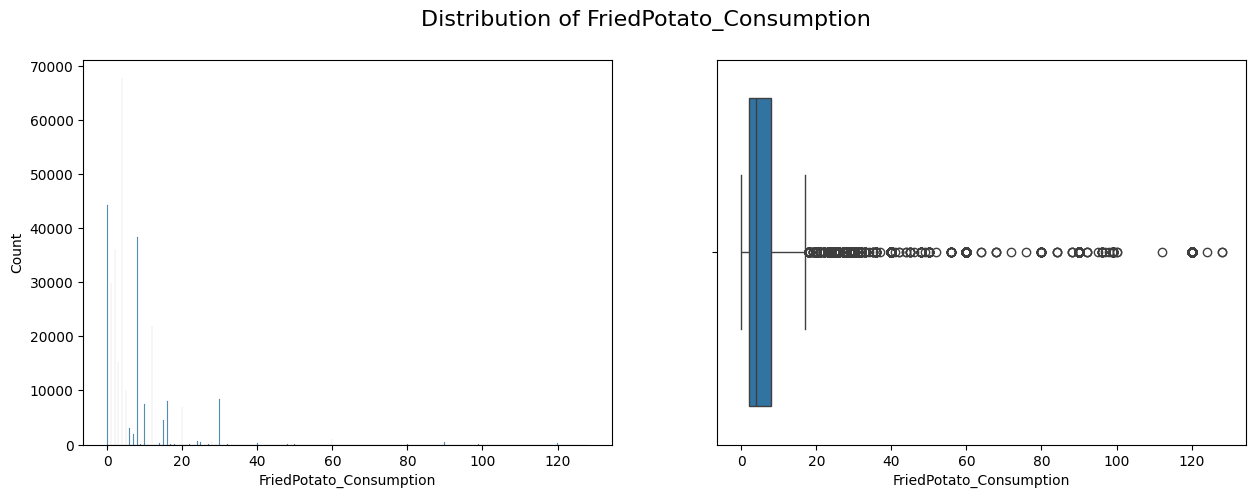

In [14]:
for feature in numerical_data:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot histogram
    sns.histplot(data=df, x=feature, ax=ax1)

    # Plot boxplot
    sns.boxplot(data=df, x=feature, ax=ax2)

    # Add a single title for both subplots
    fig.suptitle(f'Distribution of {feature}', fontsize=16)

    plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308774 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308774 non-null  object 
 1   Checkup                       308774 non-null  object 
 2   Exercise                      308774 non-null  object 
 3   Heart_Disease                 308774 non-null  object 
 4   Skin_Cancer                   308774 non-null  object 
 5   Other_Cancer                  308774 non-null  object 
 6   Depression                    308774 non-null  object 
 7   Diabetes                      308774 non-null  object 
 8   Arthritis                     308774 non-null  object 
 9   Sex                           308774 non-null  object 
 10  Age_Category                  308774 non-null  object 
 11  Height_(cm)                   308774 non-null  float64
 12  Weight_(kg)                   308774 non-null  fl

**Bivariate Analysis**

In [16]:
diseases = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis']
factors = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

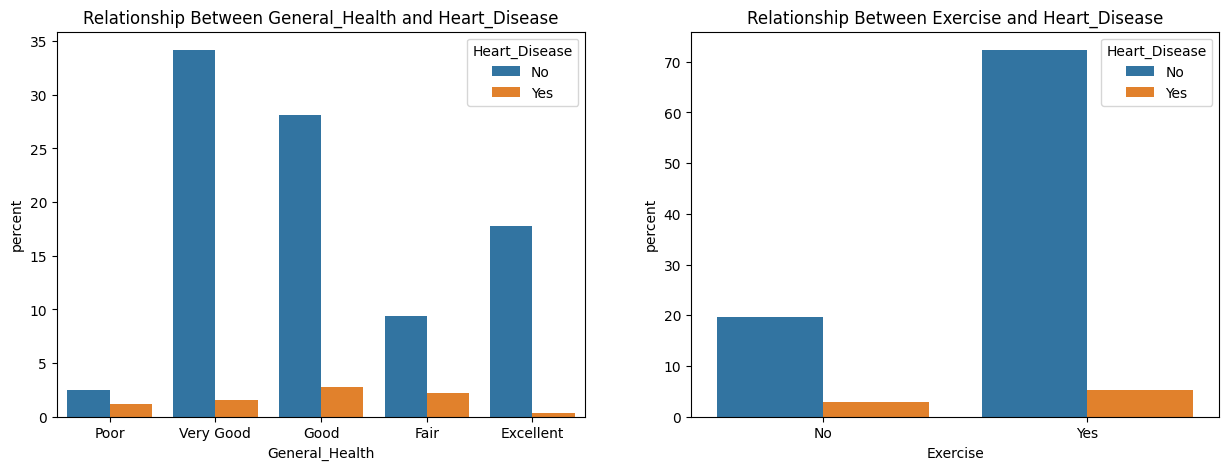

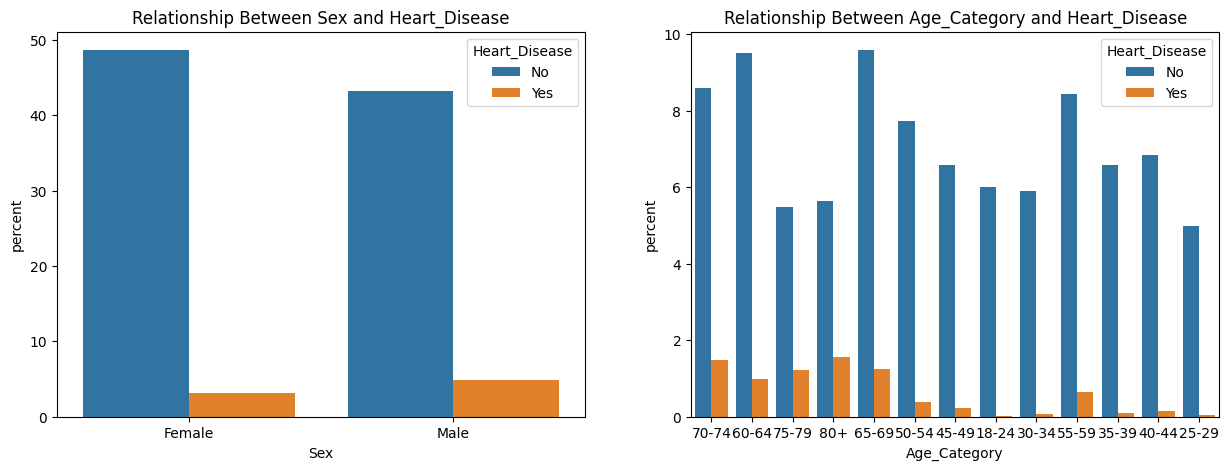

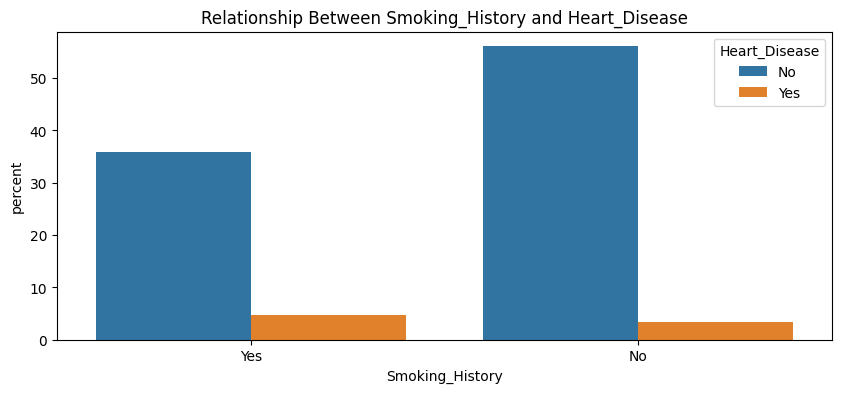

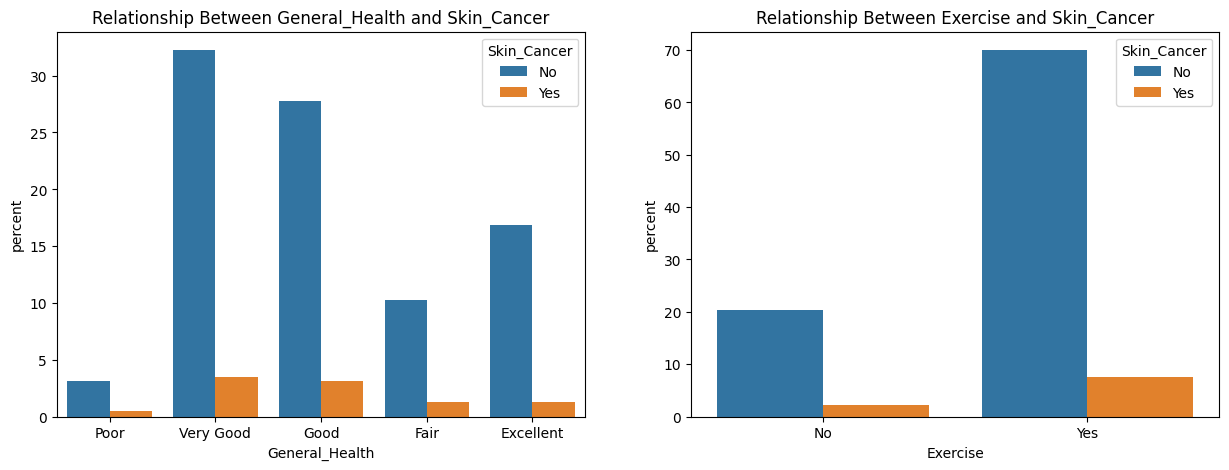

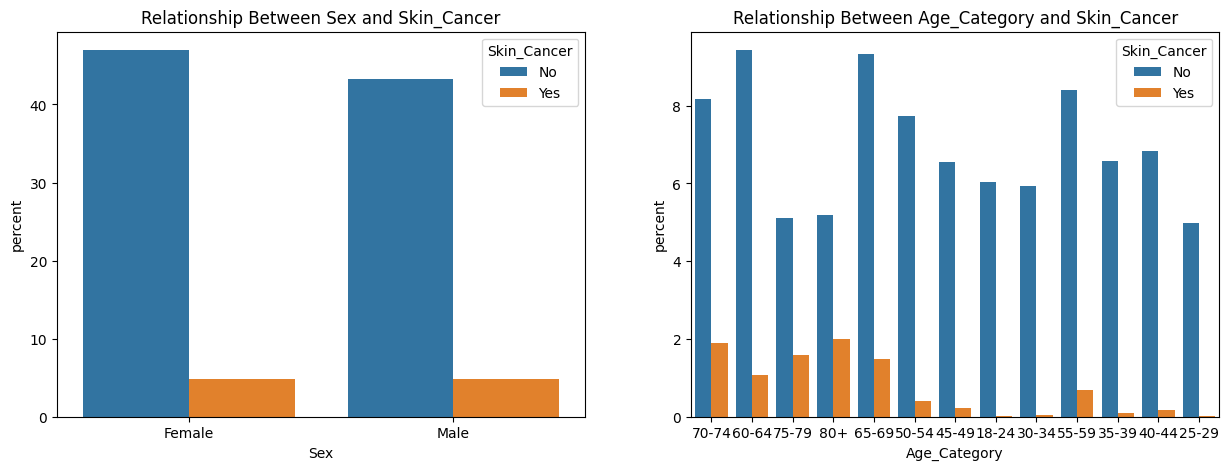

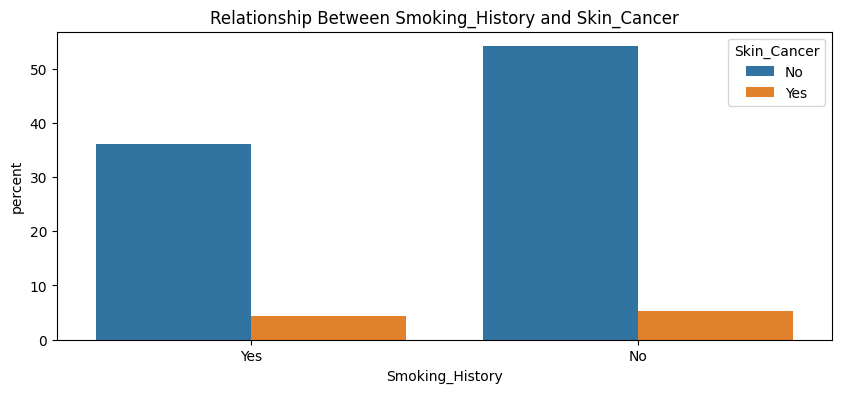

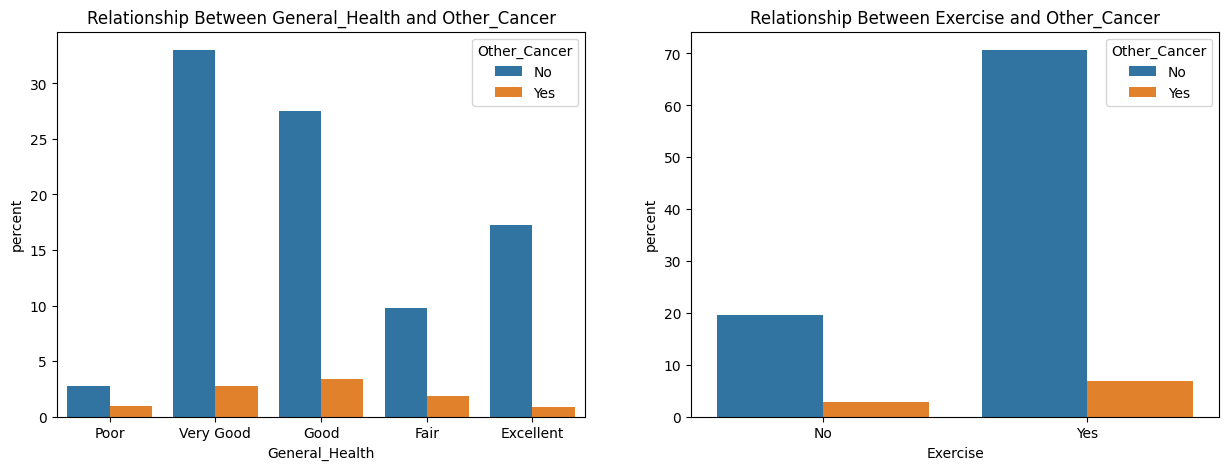

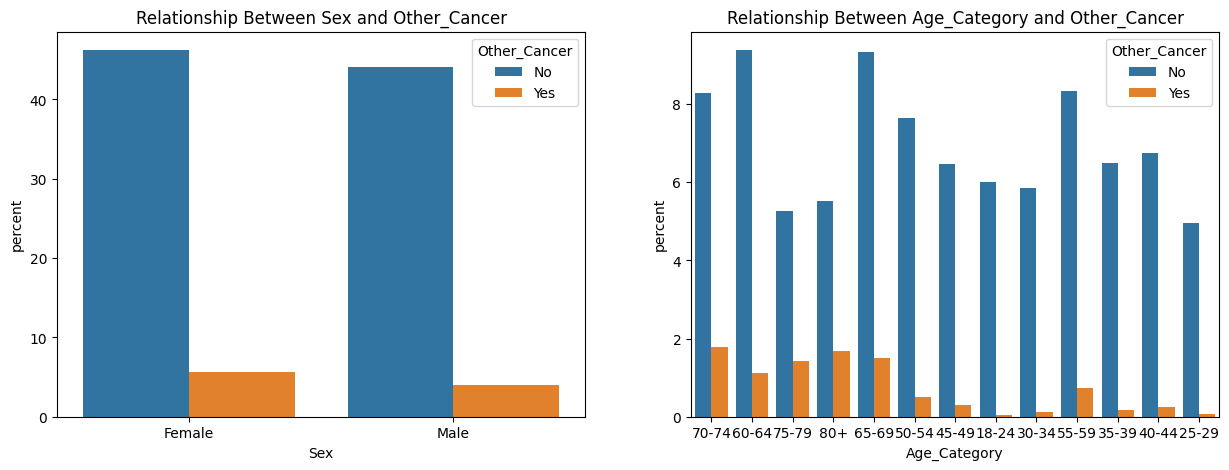

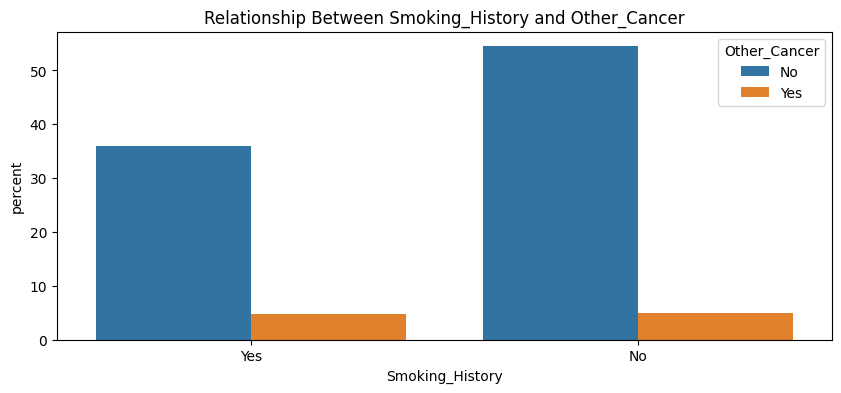

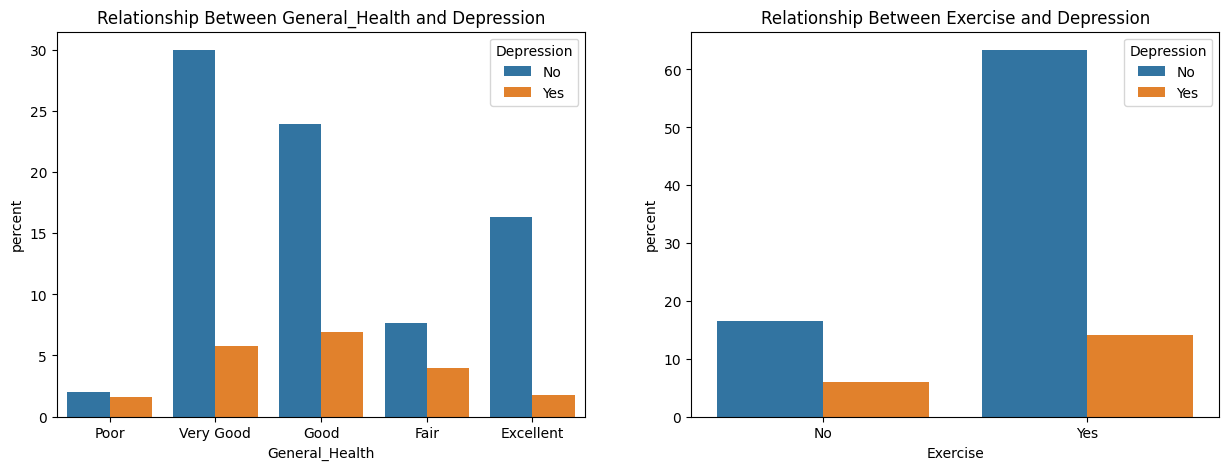

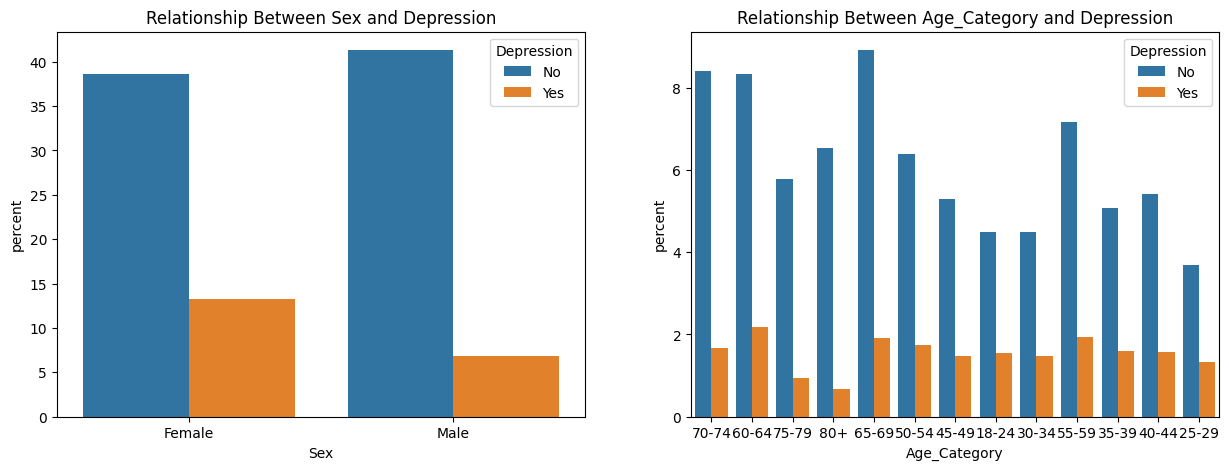

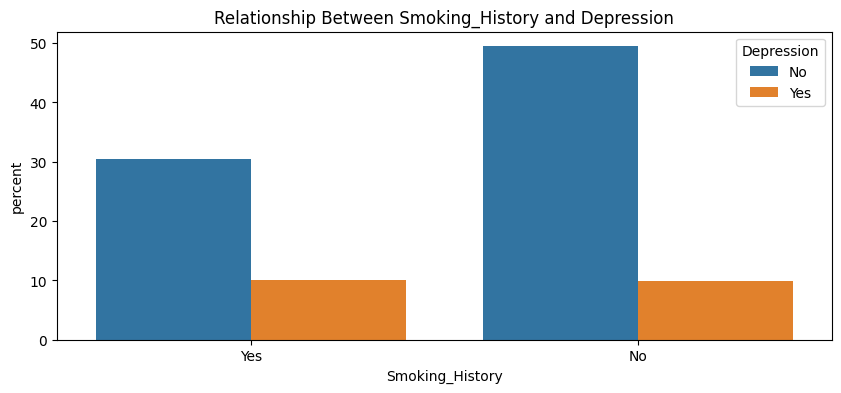

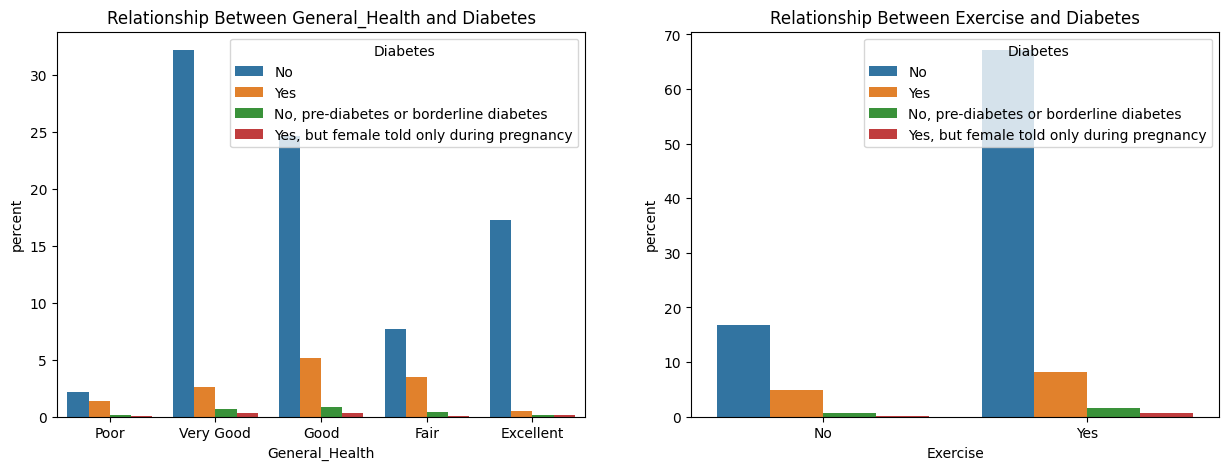

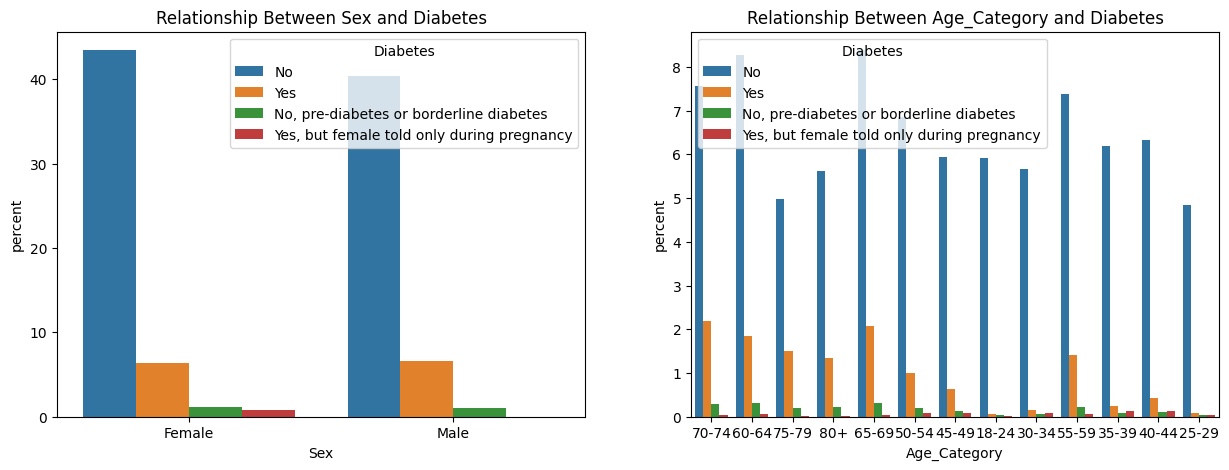

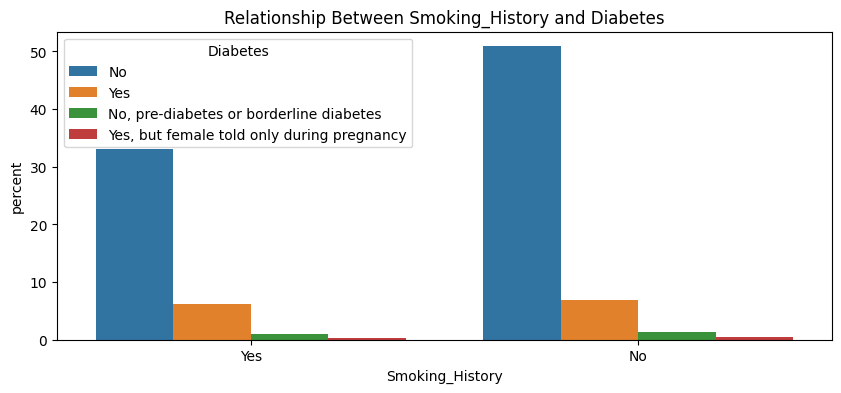

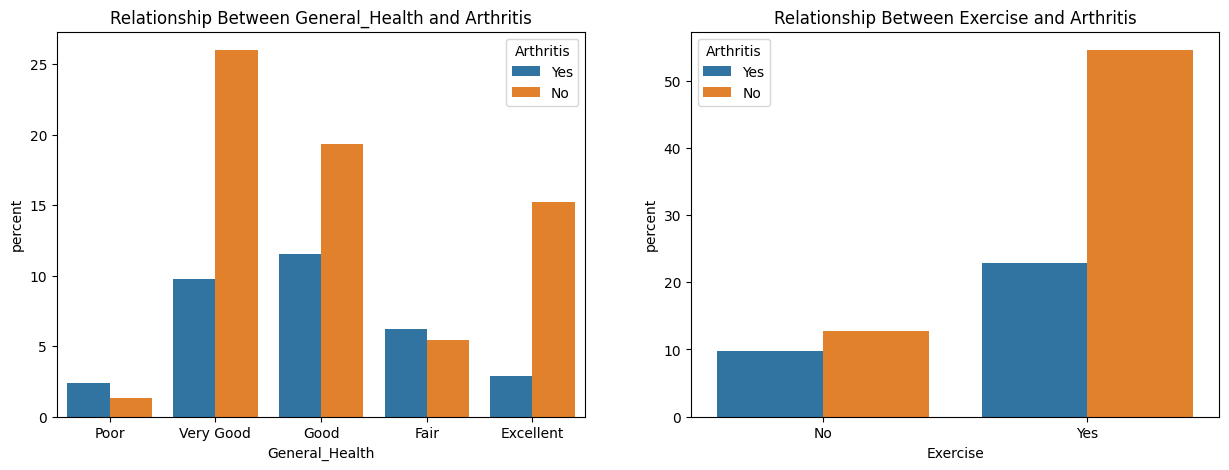

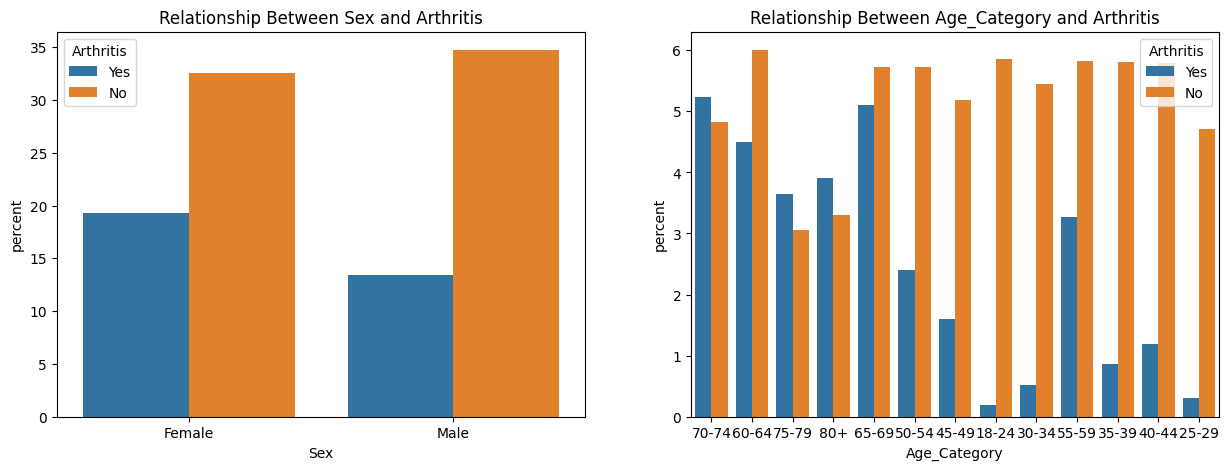

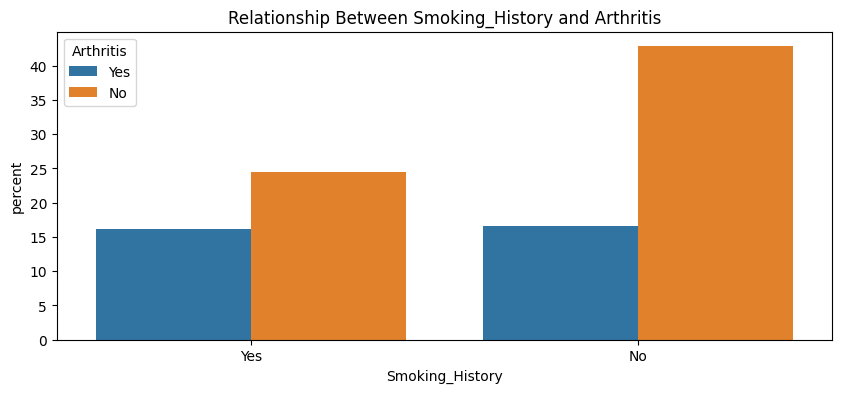

In [17]:
for disease in diseases:
    for i, factor in enumerate(factors):
        if i % 2:
          fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
          sns.countplot(data=df, x=factors[i-1], hue=disease, stat="percent", ax=ax1)
          ax1.set_title(f'Relationship Between {factors[i-1]} and {disease}')
          sns.countplot(data=df, x=factor, hue=disease, stat="percent", ax=ax2)
          ax2.set_title(f'Relationship Between {factor} and {disease}')
          plt.show()
        if i == len(factors) - 1:
          fig = plt.figure(figsize=(10, 4))
          sns.countplot(data=df, x=factor, hue=disease, stat="percent")
          plt.title(f'Relationship Between {factor} and {disease}')
          plt.show()

In [18]:
df.sample(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
245671,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,80+,165.0,56.70,20.80,No,0.0,60.0,30.0,1.0
41675,Very Good,Within the past year,No,No,Yes,No,Yes,No,No,Female,75-79,183.0,77.11,23.06,Yes,0.0,10.0,4.0,3.0
189721,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Male,80+,178.0,100.24,31.71,Yes,0.0,20.0,28.0,8.0
70586,Good,Within the past year,No,No,No,No,Yes,Yes,Yes,Female,60-64,163.0,81.65,30.90,No,0.0,8.0,15.0,15.0
285322,Good,5 or more years ago,Yes,No,No,No,No,No,No,Female,40-44,157.0,86.18,34.75,No,0.0,10.0,8.0,1.0


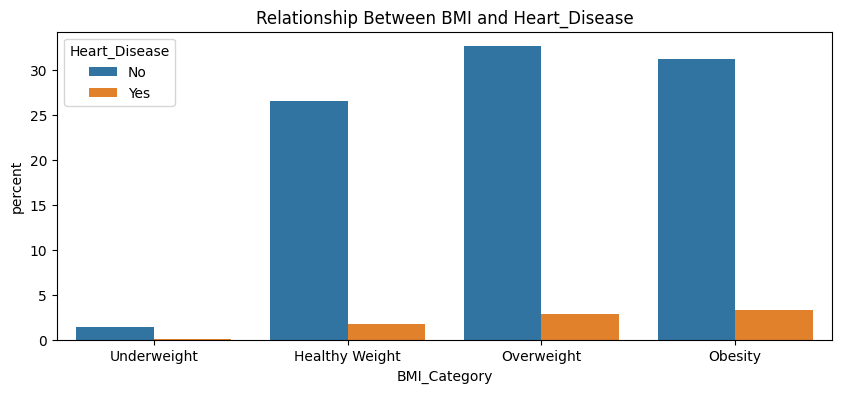

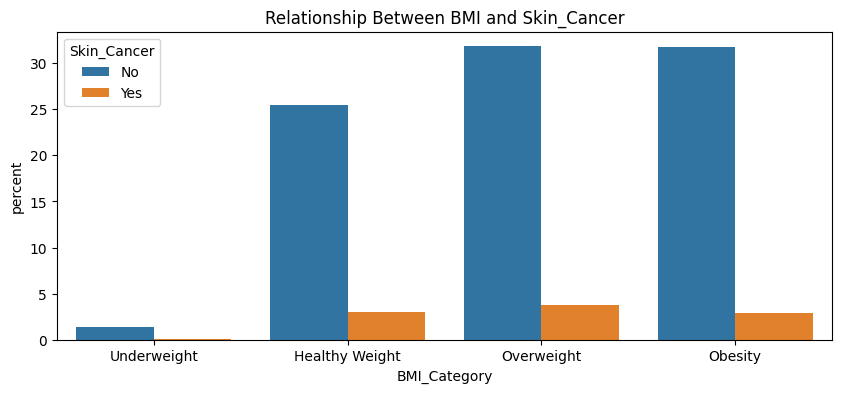

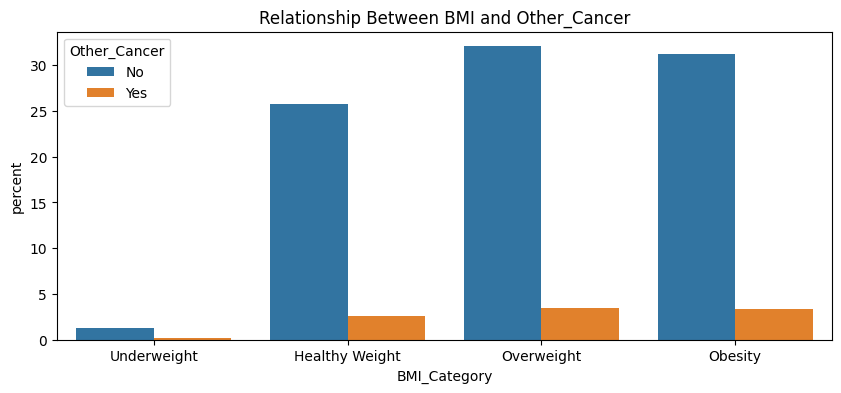

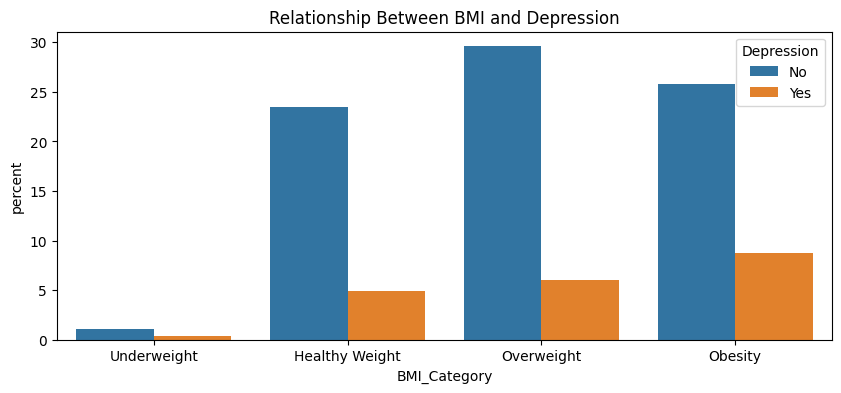

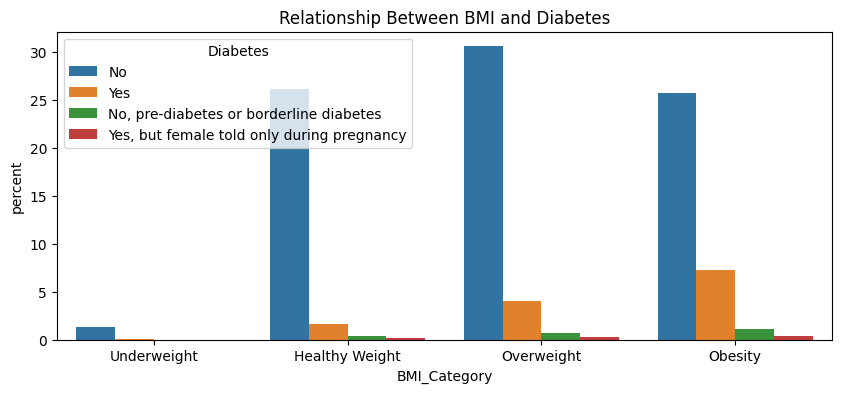

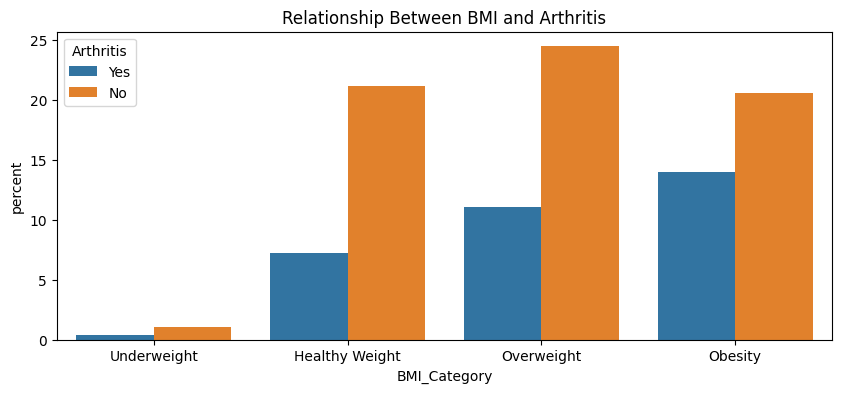

In [19]:
# Need to categorize BMI to analyze bmi and diseases
# Below 18.5	Underweight
# 18.5 – 24.9	Healthy Weight
# 25.0 – 29.9	Overweight
# 30.0 and Above	Obesity
# ref: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])

for disease in diseases:
  plt.figure(figsize=(10, 4))
  sns.countplot(data=df, x='BMI_Category', hue=disease, stat='percent')
  plt.title(f'Relationship Between BMI and {disease}')
  plt.show()

# **CORRELATION MATRIX**

**Data Preprocessing**

In [20]:
df.sample(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category
188588,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,80+,157.0,76.66,30.91,No,0.0,60.0,30.0,0.0,Obesity
85750,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Male,35-39,183.0,90.72,27.12,Yes,15.0,15.0,20.0,20.0,Overweight
186732,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,70-74,178.0,104.33,33.00,No,4.0,8.0,12.0,12.0,Obesity
51892,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Male,45-49,173.0,117.93,39.53,No,0.0,30.0,30.0,4.0,Obesity
180318,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,152.0,58.97,25.39,No,1.0,12.0,12.0,4.0,Overweight


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308774 entries, 0 to 308853
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   General_Health                308774 non-null  object  
 1   Checkup                       308774 non-null  object  
 2   Exercise                      308774 non-null  object  
 3   Heart_Disease                 308774 non-null  object  
 4   Skin_Cancer                   308774 non-null  object  
 5   Other_Cancer                  308774 non-null  object  
 6   Depression                    308774 non-null  object  
 7   Diabetes                      308774 non-null  object  
 8   Arthritis                     308774 non-null  object  
 9   Sex                           308774 non-null  object  
 10  Age_Category                  308774 non-null  object  
 11  Height_(cm)                   308774 non-null  float64 
 12  Weight_(kg)                   30877

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [23]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Cardiovascular Diseases Risk Prediction Dataset.csv')
df['General_Health'] = df['General_Health'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [24]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [25]:
# Define the categories
categories = [
    ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
    ['Never', '5 or more years ago', 'Within the past 5 years', 'Within the past 2 years', 'Within the past year'],
    ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
]

# Initialize OrdinalEncoder
oe = OrdinalEncoder(categories=categories)

# Select the columns to be encoded
columns_to_encode = ['General_Health', 'Checkup', 'Age_Category']

# Fit and transform the columns
encoded_columns = oe.fit_transform(df[columns_to_encode])

# Convert the result back to a DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=columns_to_encode)

# Drop the original columns from the original DataFrame
df = df.drop(columns=columns_to_encode)

# Concatenate the encoded columns back with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)
df.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Age_Category
0,No,No,No,No,No,No,Yes,Female,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,0.0,3.0,10.0
1,No,Yes,No,No,No,Yes,No,Female,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,3.0,4.0,10.0
2,Yes,No,No,No,No,Yes,No,Female,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,3.0,4.0,8.0
3,Yes,Yes,No,No,No,Yes,No,Male,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,0.0,4.0,11.0
4,No,No,No,No,No,No,No,Male,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,2.0,4.0,12.0


In [26]:
# Mapping for Diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1 })
# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

df.sample(5)

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Age_Category
232719,1,0,0,0,0,1,0,0,191.0,97.52,26.87,1,1.0,30.0,6.0,2.0,1.0,4.0,8.0
82479,0,0,0,0,1,0,0,1,157.0,54.43,21.95,0,30.0,0.0,1.0,2.0,1.0,4.0,5.0
194441,1,0,0,0,0,0,0,1,163.0,108.86,41.20,0,0.0,12.0,8.0,2.0,2.0,4.0,0.0
77354,1,0,0,0,0,0,1,1,170.0,86.18,29.76,0,5.0,60.0,30.0,5.0,1.0,4.0,7.0
158097,1,0,0,0,0,0,0,0,191.0,99.79,27.50,0,12.0,4.0,12.0,4.0,3.0,2.0,4.0


In [27]:
df.drop_duplicates(inplace=True)

**Correlation Matrix**

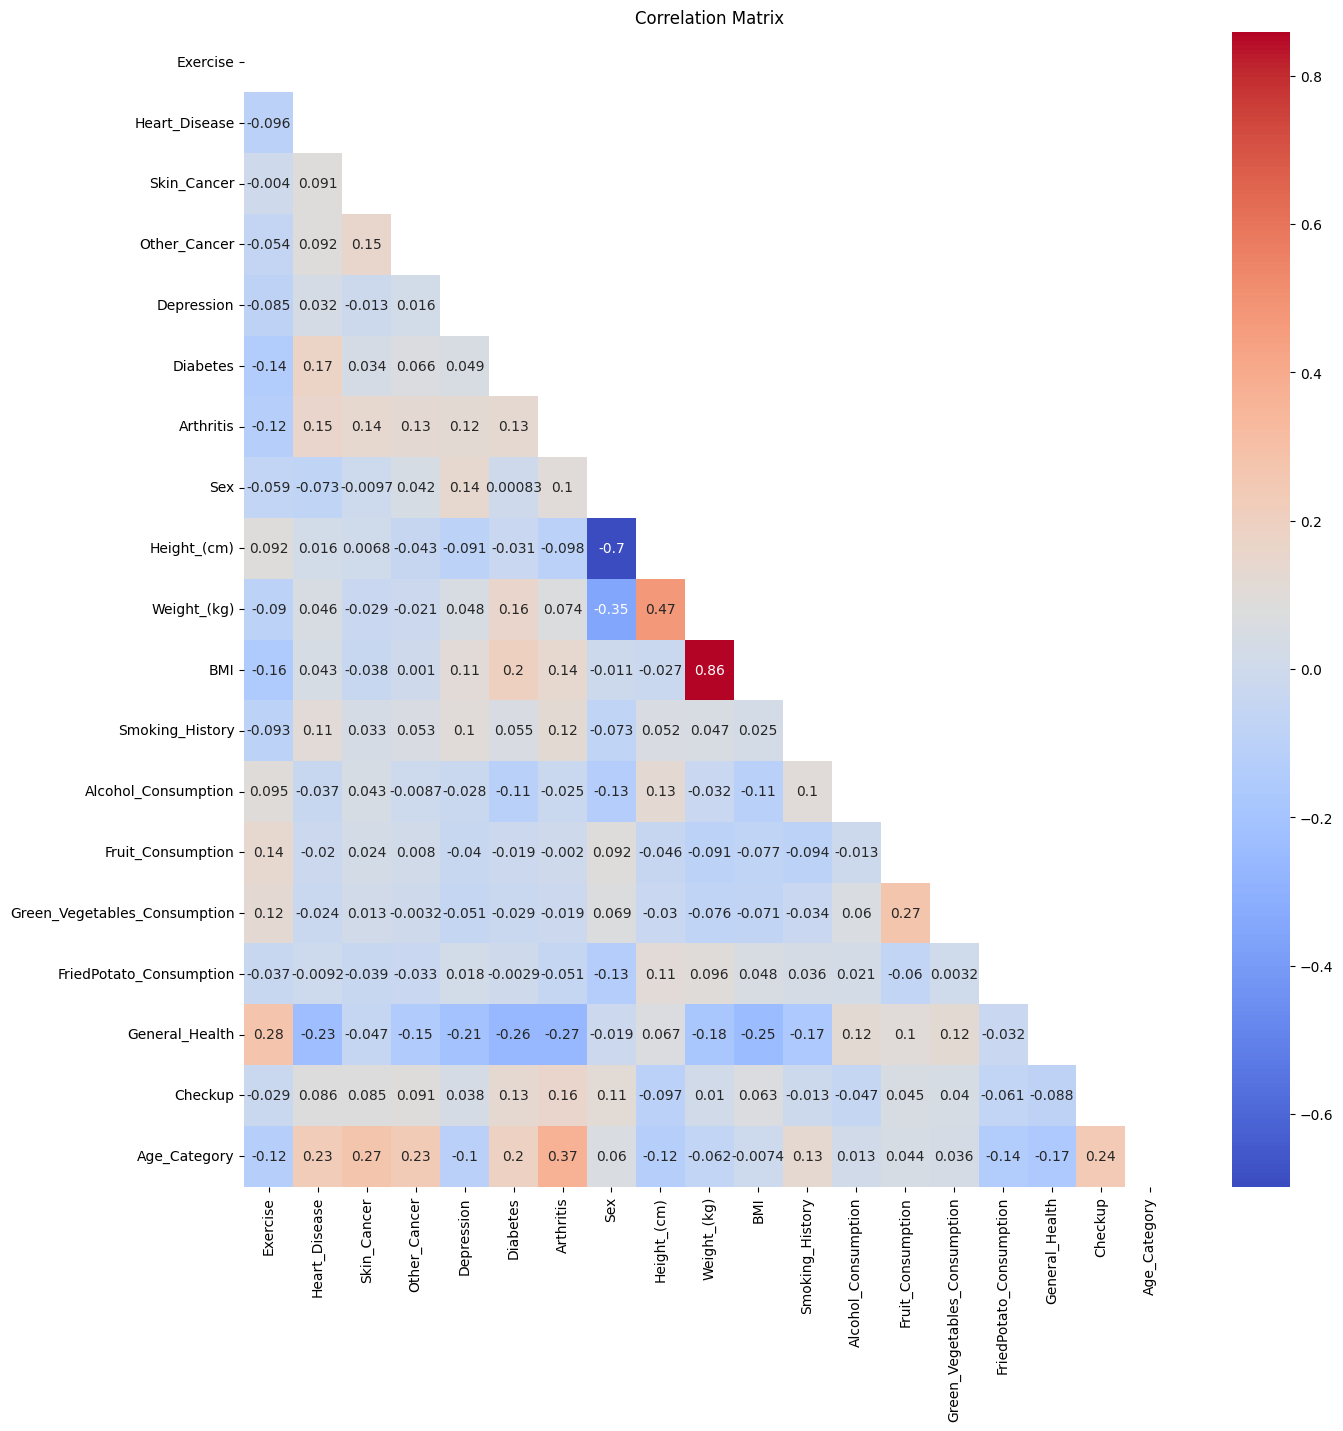

In [28]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a mask to hide the upper triangular part
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with the masked correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

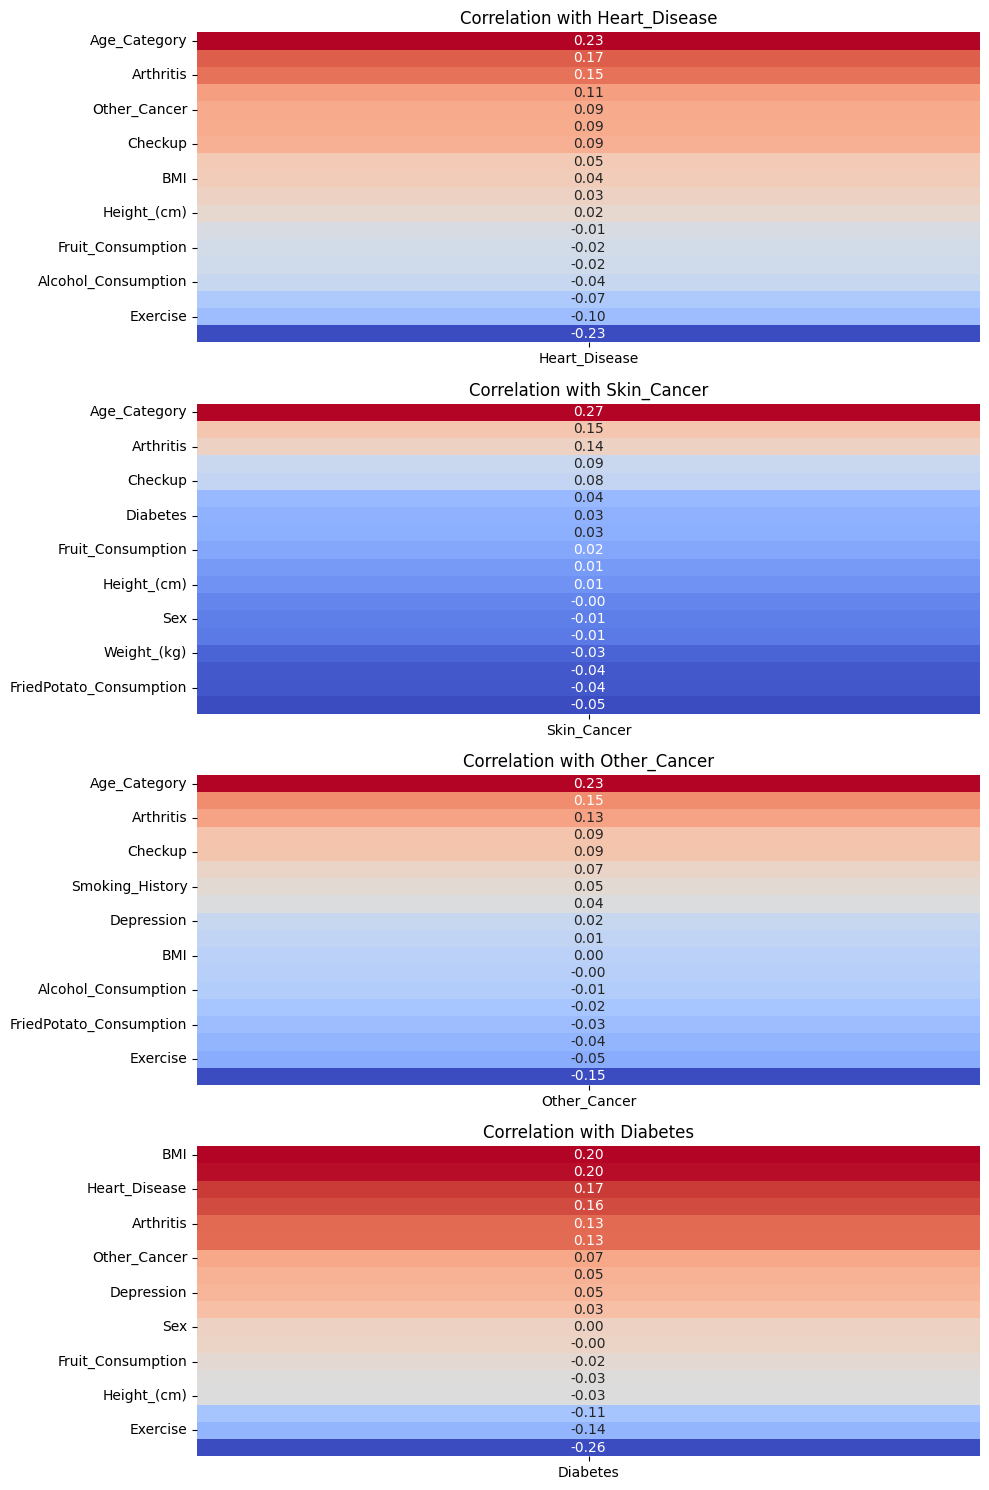

In [29]:
# Compute the correlation of each feature with the disease variables
diseases = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']
corr = df.corr()

# Create a subplot for each disease
fig, axs = plt.subplots(len(diseases), 1, figsize=(10, 15))

for ax, disease in zip(axs, diseases):
    # Compute the correlation with the disease
    target_corr = corr[disease].drop(disease)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Plot a heatmap of the correlations with the disease
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()

# **Data Cleaning**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Cardiovascular Diseases Risk Prediction Dataset.csv')

In [5]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [6]:
df.duplicated().sum()

80

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(308774, 19)

# **Data Preparation**

**Feature Engineering**

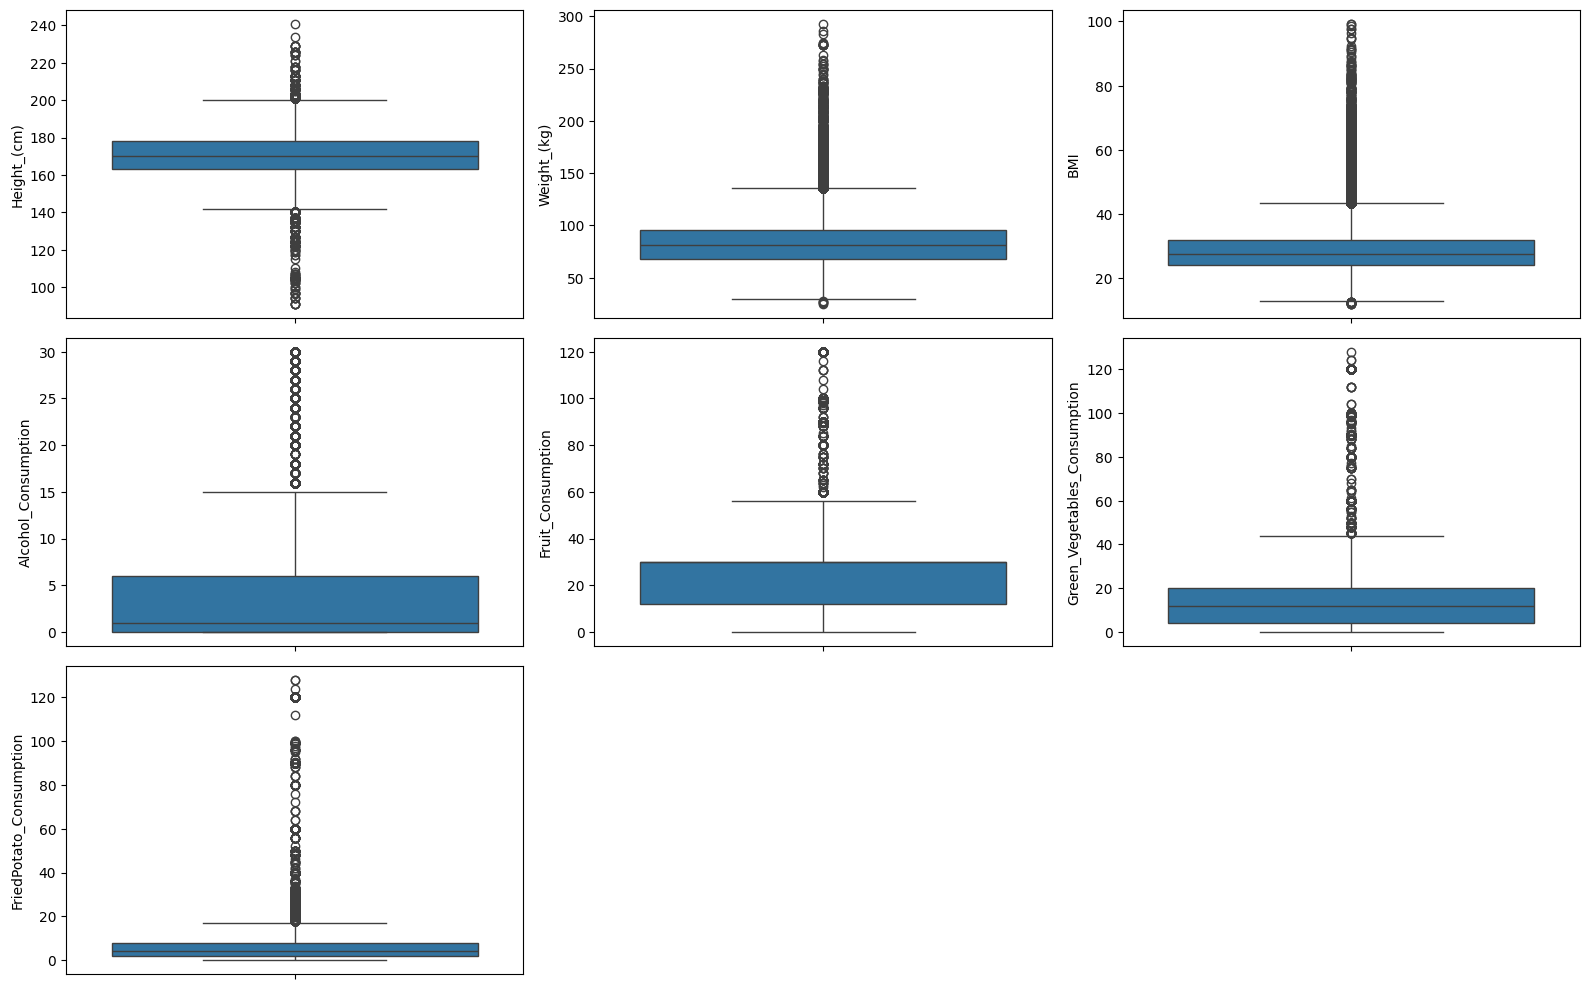

In [66]:
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                  'Fruit_Consumption', 'Green_Vegetables_Consumption',
                  'FriedPotato_Consumption']

# Create box plots
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])

plt.tight_layout()

In [67]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


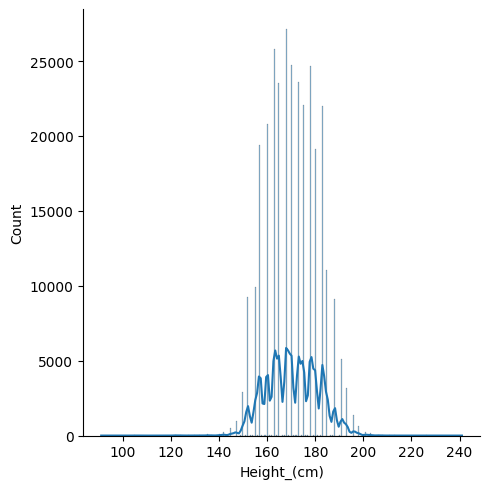

In [37]:
sns.displot(df['Height_(cm)'], kde=True)

In [38]:
df['Height_(cm)'].skew()

0.015299417864624468

In [39]:
# finding the boundary values
hightest = df['Height_(cm)'].mean() + 3 * df['Height_(cm)'].std()
lowest = df['Height_(cm)'].mean() - 3 * df['Height_(cm)'].std()
print(hightest, lowest)

202.59057573714534 138.6398646496748


In [40]:
# calculating z-score
z_scores = (df['Height_(cm)'] - df['Height_(cm)'].mean()) / df['Height_(cm)'].std()
threshold = 3
outliers = df[abs(z_scores) > threshold]
print(len(outliers))

681


In [41]:
# capping the outliers
df['Height_(cm)'] = np.where(df['Height_(cm)'] > hightest, hightest, np.where(df['Height_(cm)'] < lowest, lowest, df['Height_(cm)']))

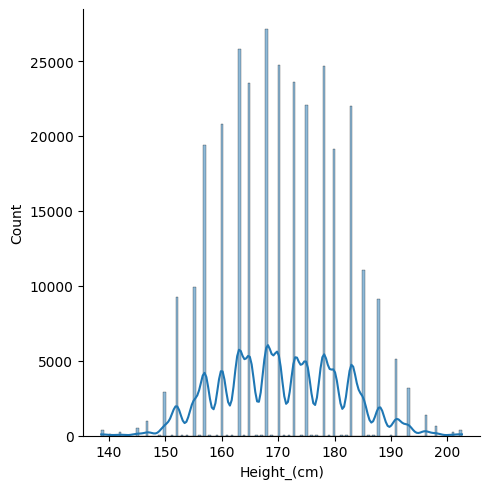

In [42]:
sns.displot(df['Height_(cm)'], kde=True)

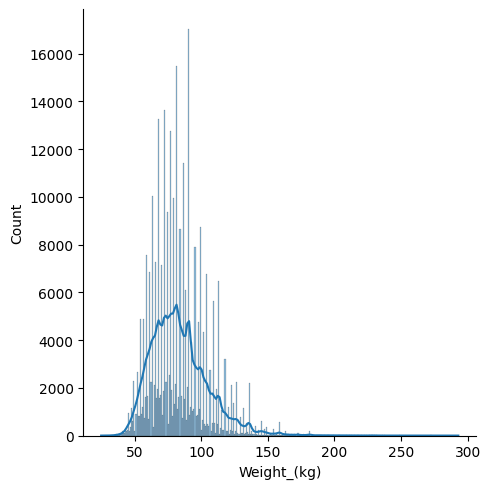

In [43]:
sns.displot(df['Weight_(kg)'], kde=True)

In [44]:
df['Weight_(kg)'].skew()

1.0580988510087124

In [45]:
def find_limit(df, column):
  percentile25 = df[column].quantile(0.25)
  percentile75 = df[column].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  return upper_limit, lower_limit

In [46]:
wup, wlw = find_limit(df, 'Weight_(kg)')
print(wup, wlw)

136.065 27.225000000000016


In [47]:
bup, blw = find_limit(df, 'BMI')
print(bup, blw)

43.31 12.75


In [48]:
total_outliers_w = len(df[(df['Weight_(kg)'] > wup) | (df['Weight_(kg)'] < wlw)])
total_outliers_b = len(df[(df['BMI'] > bup) | (df['BMI'] < blw)])
print(total_outliers_w, total_outliers_b)

7326 9530


In [9]:
# BMI Category
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])

# Lifestyle Score
exercise_mapping = {'Yes': 1, 'No': 0}
smoking_mapping = {'Yes': -1, 'No': 0}
df['Lifestyle_Score'] = df['Exercise'].map(exercise_mapping) + df['Smoking_History'].map(smoking_mapping)  + df['Fruit_Consumption']/10 + df['Green_Vegetables_Consumption']/10 - df['FriedPotato_Consumption']/10
# Diet Score
df['Diet_Score'] = df['Fruit_Consumption']/10 + df['Green_Vegetables_Consumption']/10 - df['FriedPotato_Consumption']/10
# Bad Habbit Score
smoking_mapping = {'Yes': 1, 'No': 0}
df['Bad_Habbit_Score'] = df['Alcohol_Consumption']/10 + df['Smoking_History'].map(smoking_mapping)
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Lifestyle_Score,Diet_Score,Bad_Habbit_Score
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,14.54,Yes,0.0,30.0,16.0,12.0,Underweight,2.4,3.4,1.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,28.29,No,0.0,30.0,0.0,4.0,Overweight,2.6,2.6,0.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,33.47,No,4.0,12.0,3.0,16.0,Obesity,0.9,-0.1,0.4
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,28.73,No,0.0,30.0,30.0,8.0,Overweight,6.2,5.2,0.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,24.37,Yes,0.0,8.0,4.0,0.0,Healthy Weight,0.2,1.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,...,29.05,No,4.0,30.0,8.0,0.0,Overweight,4.8,3.8,0.4
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,...,21.48,No,8.0,15.0,60.0,4.0,Healthy Weight,8.1,7.1,0.8
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,...,24.69,Yes,4.0,40.0,8.0,4.0,Healthy Weight,4.4,4.4,1.4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,...,23.73,No,3.0,30.0,12.0,0.0,Healthy Weight,5.2,4.2,0.3


**Feature Preprocessing**

In [10]:
# Mapping for Diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)

# Mapping for Sex
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1 })

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

# Ordinal encoding for General_Health, Age_Category,BMI_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['General_Health'] = df['General_Health'].map(general_health_mapping)

bmi_mapping = {
    'Underweight': 0,
    'Healthy Weight': 1,
    'Overweight': 2,
    'Obesity': 3
}

df['BMI_Category'] = df['BMI_Category'].map(bmi_mapping)

age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df['Age_Category'] = df['Age_Category'].map(age_category_mapping)

df = df.drop(["Checkup"],axis=1)
df.head()

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Lifestyle_Score,Diet_Score,Bad_Habbit_Score
0,0,0,0,0,0,0,0,1,1,10,...,14.54,1,0.0,30.0,16.0,12.0,0,2.4,3.4,1.0
1,3,0,1,0,0,0,1,0,1,10,...,28.29,0,0.0,30.0,0.0,4.0,2,2.6,2.6,0.0
2,3,1,0,0,0,0,1,0,1,8,...,33.47,0,4.0,12.0,3.0,16.0,3,0.9,-0.1,0.4
3,0,1,1,0,0,0,1,0,0,11,...,28.73,0,0.0,30.0,30.0,8.0,2,6.2,5.2,0.0
4,2,0,0,0,0,0,0,0,0,12,...,24.37,1,0.0,8.0,4.0,0.0,1,0.2,1.2,1.0


In [11]:
df['BMI_Category'] = df['BMI_Category'].astype('int')

# **Applying Various Machine Learning Model**

In [12]:
data = df.copy()

# **GRADIENT BOOSTING**

In [13]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [14]:
# Define the features and target
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# # Define the model with default hyperparameters
# model = XGBClassifier(
#     scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
#     eval_metric='logloss', # use logloss to evaluate performance
#     use_label_encoder=False # to avoid warning message
# )

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)
# y_score = model.predict_proba(X_test)[:,1]

In [17]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority') # resampling strategy is set to 'minority' to resample the minority class
scaler = MinMaxScaler()
model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), # adjust class weights due to class imbalance
                      eval_metric='logloss', # use logloss to evaluate performance
                      use_label_encoder=False) # to avoid warning message
pipeline = Pipeline([('MinMaxScale', scaler), ('SMOTE', resampling), ('Model', model)])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_score = pipeline.predict_proba(X_test)[:,1]

**MODEL EVALUATION (XGBClassifier)**

In [18]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82     56677
           1       0.20      0.79      0.32      5078

    accuracy                           0.72     61755
   macro avg       0.59      0.75      0.57     61755
weighted avg       0.91      0.72      0.78     61755



**Confusion Matrix (XGBClassifier)**

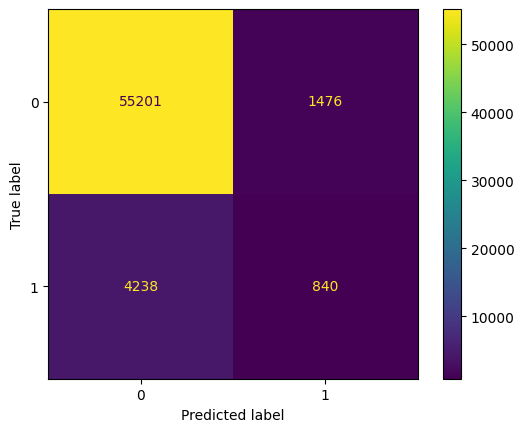

In [35]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

**ROC curve and ROC area (XGBClassifier)**

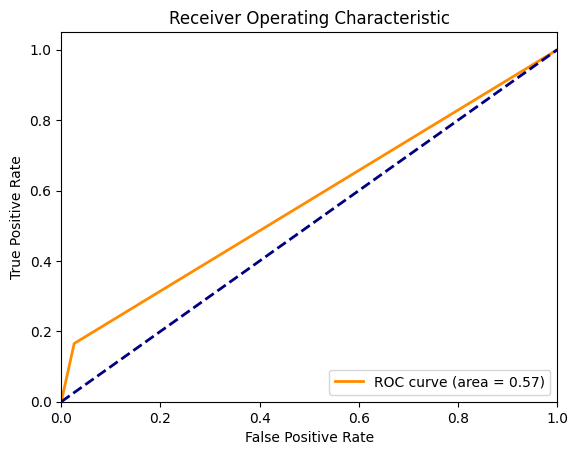

In [27]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Precision-Recall Curve (XGBClassifier)**

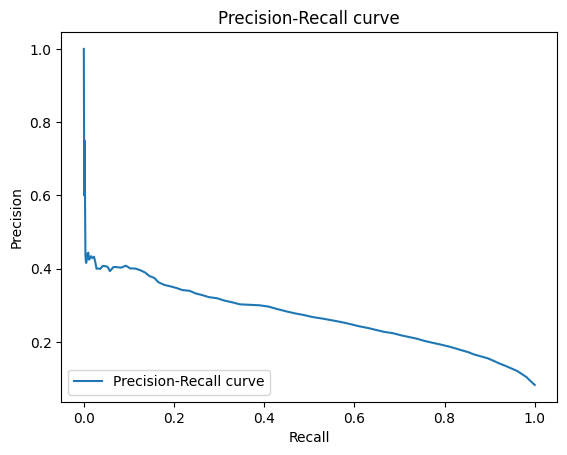

In [28]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

plt.show()

**Learning Curve (XGBClassifier)**

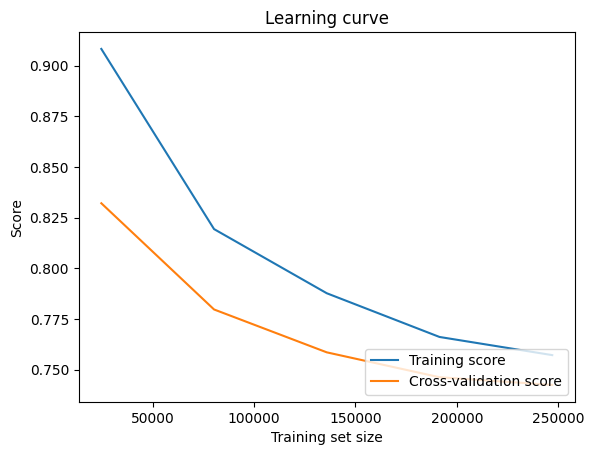

In [92]:
# Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc="lower right")
plt.show()

# **Random Forest Classifier**

In [20]:
data = df.copy()

In [21]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [22]:
# Define the features and target
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
X_train.shape

(247019, 21)

In [23]:
# Define the pipeline
resampling = SMOTE()
scaler = MinMaxScaler()
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)
pipeline = Pipeline([('MinMaxScale', scaler), ('SMOTE', resampling), ('Model', model)])

In [24]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_score = pipeline.predict_proba(X_test)[:,1]

**MODEL EVALUATION (RandomForestClassifier)**

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56677
           1       0.36      0.17      0.23      5078

    accuracy                           0.91     61755
   macro avg       0.65      0.57      0.59     61755
weighted avg       0.88      0.91      0.89     61755



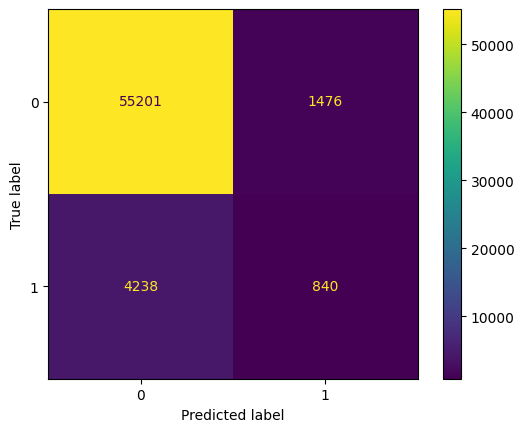

In [26]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()